total cases for all states

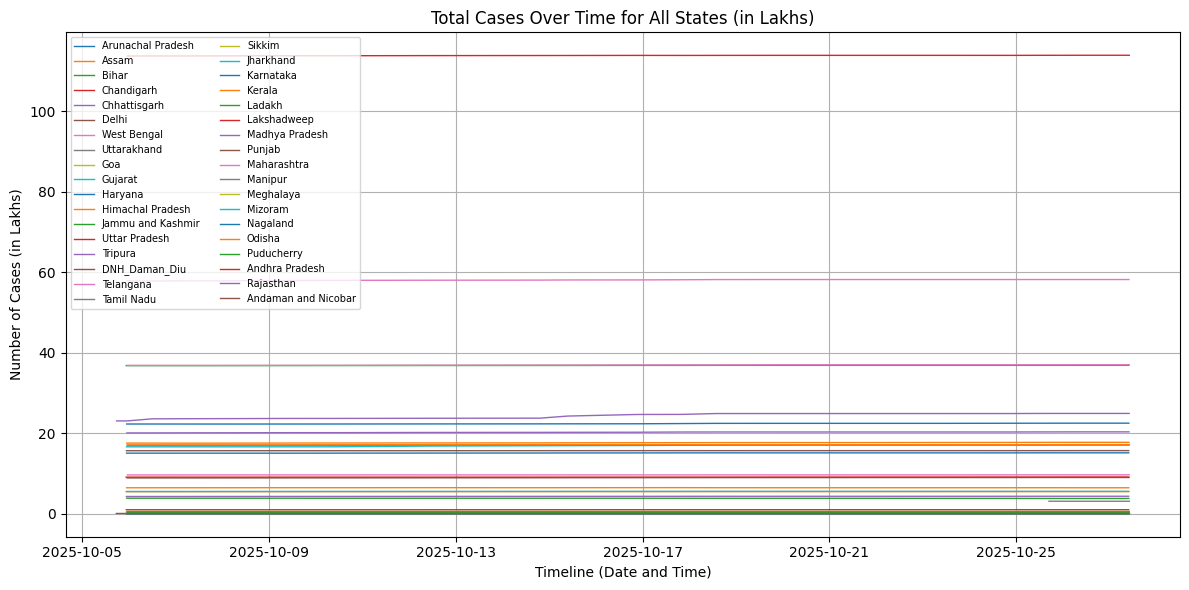

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file
file_path = r"C:\Users\Admin\Downloads\States.xlsx"
excel_data = pd.ExcelFile(file_path)

# Step 2: Combine data from all sheets
combined_data = pd.DataFrame()

for sheet in excel_data.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    if 'Date and Time' in df.columns and 'Total Cases' in df.columns:
        temp = df[['Date and Time', 'Total Cases']].copy()
        temp['State'] = sheet
        combined_data = pd.concat([combined_data, temp], ignore_index=True)

# Step 3: Convert date column to datetime
combined_data['Date and Time'] = pd.to_datetime(combined_data['Date and Time'], errors='coerce')
combined_data = combined_data.dropna(subset=['Date and Time', 'Total Cases'])

# Step 4: Plot the graph
plt.figure(figsize=(12, 6))

for state in combined_data['State'].unique():
    state_data = combined_data[combined_data['State'] == state]
    plt.plot(state_data['Date and Time'], state_data['Total Cases'] / 1_00_000, label=state, linewidth=1)
    # Divide by 1,00,000 to convert cases to Lakhs

# Step 5: Customize graph
plt.title("Total Cases Over Time for All States (in Lakhs)")
plt.xlabel("Timeline (Date and Time)")
plt.ylabel("Number of Cases (in Lakhs)")
plt.legend(fontsize=7, loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()

# Step 6: Show the graph
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11840\833010079.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_no_avg = pivot_no_avg.fillna(method='ffill', axis=1)


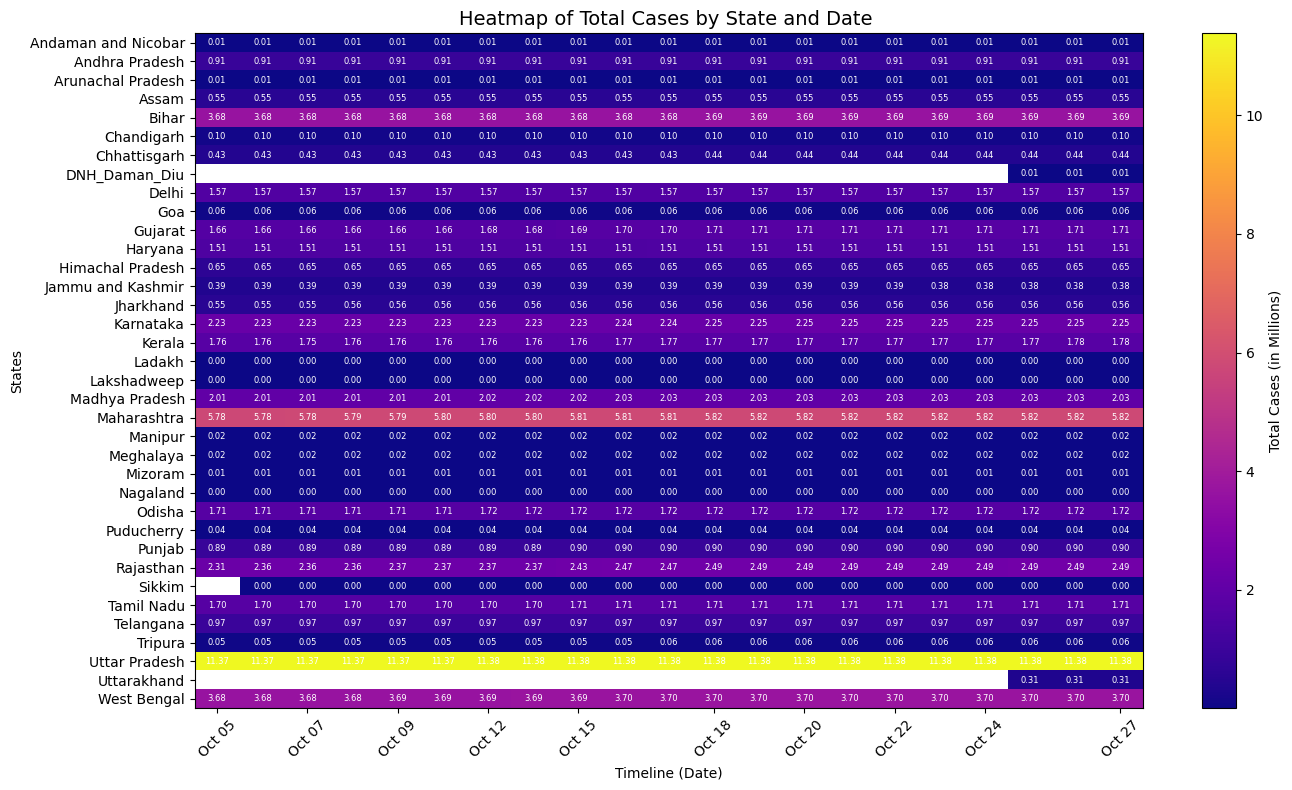

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Excel file
file_path = r"C:\Users\Admin\Downloads\States.xlsx"
excel_data = pd.ExcelFile(file_path)

# Step 2: Combine all states’ data
combined_data = pd.DataFrame()
for sheet in excel_data.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    if 'Date and Time' in df.columns and 'Total Cases' in df.columns:
        temp = df[['Date and Time', 'Total Cases']].copy()
        temp['State'] = sheet
        combined_data = pd.concat([combined_data, temp], ignore_index=True)

# Step 3: Clean and prepare data
combined_data['Date and Time'] = pd.to_datetime(combined_data['Date and Time'], errors='coerce')
combined_data = combined_data.dropna(subset=['Date and Time', 'Total Cases'])

# Step 4: Get latest total cases per day per state (no averaging)
combined_data['Date'] = combined_data['Date and Time'].dt.date
latest_data = combined_data.sort_values('Date and Time').groupby(['State', 'Date']).tail(1)

# Step 5: Pivot table (states as rows, dates as columns)
pivot_no_avg = latest_data.pivot(index='State', columns='Date', values='Total Cases')

# Optional: Fill missing days forward (since total cases are cumulative)
pivot_no_avg = pivot_no_avg.fillna(method='ffill', axis=1)

# Step 6: Plot the heatmap (values in Millions)
plt.figure(figsize=(14, 8))
im = plt.imshow(pivot_no_avg / 1_000_000, aspect='auto', cmap='plasma')

# Add colorbar
plt.colorbar(im, label='Total Cases (in Millions)')

# Title and labels
plt.title('Heatmap of Total Cases by State and Date ', fontsize=14)
plt.xlabel('Timeline (Date)')
plt.ylabel('States')

# X-axis labels — fewer for readability
x_ticks = np.linspace(0, len(pivot_no_avg.columns)-1, 10).astype(int)
plt.xticks(
    ticks=x_ticks,
    labels=[pivot_no_avg.columns[i].strftime('%b %d') for i in x_ticks],
    rotation=45
)
plt.yticks(ticks=np.arange(len(pivot_no_avg.index)), labels=pivot_no_avg.index)

# Step 7: Annotate each cell with numeric values (in Millions)
for i in range(len(pivot_no_avg.index)):
    for j in range(len(pivot_no_avg.columns)):
        val = pivot_no_avg.iloc[i, j]
        if not pd.isna(val):
            plt.text(j, i, f'{val/1_000_000:.2f}', ha='center', va='center', color='white', fontsize=6)

plt.tight_layout()
plt.show()


women and senior citizen

PROCESSING STATE-WISE DATA
Found 36 states: Arunachal Pradesh, Assam, Bihar, Chandigarh, Chhattisgarh, Delhi, West Bengal, Uttarakhand, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu and Kashmir, Uttar Pradesh, Tripura, DNH_Daman_Diu, Telangana, Tamil Nadu, Sikkim, Jharkhand, Karnataka, Kerala, Ladakh, Lakshadweep, Madhya Pradesh, Punjab, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Andhra Pradesh, Rajasthan, Andaman and Nicobar

State Data Summary:
                  State  Women - Civil  Women - Criminal  Women - Total  \
0     Arunachal Pradesh            528               414            942   
1                 Assam          23008             29969          52977   
2                 Bihar          88207            280365         368572   
3            Chandigarh           4799              2800           7599   
4          Chhattisgarh          18048             17901          35949   
5                 Delhi          33763             74212         1079

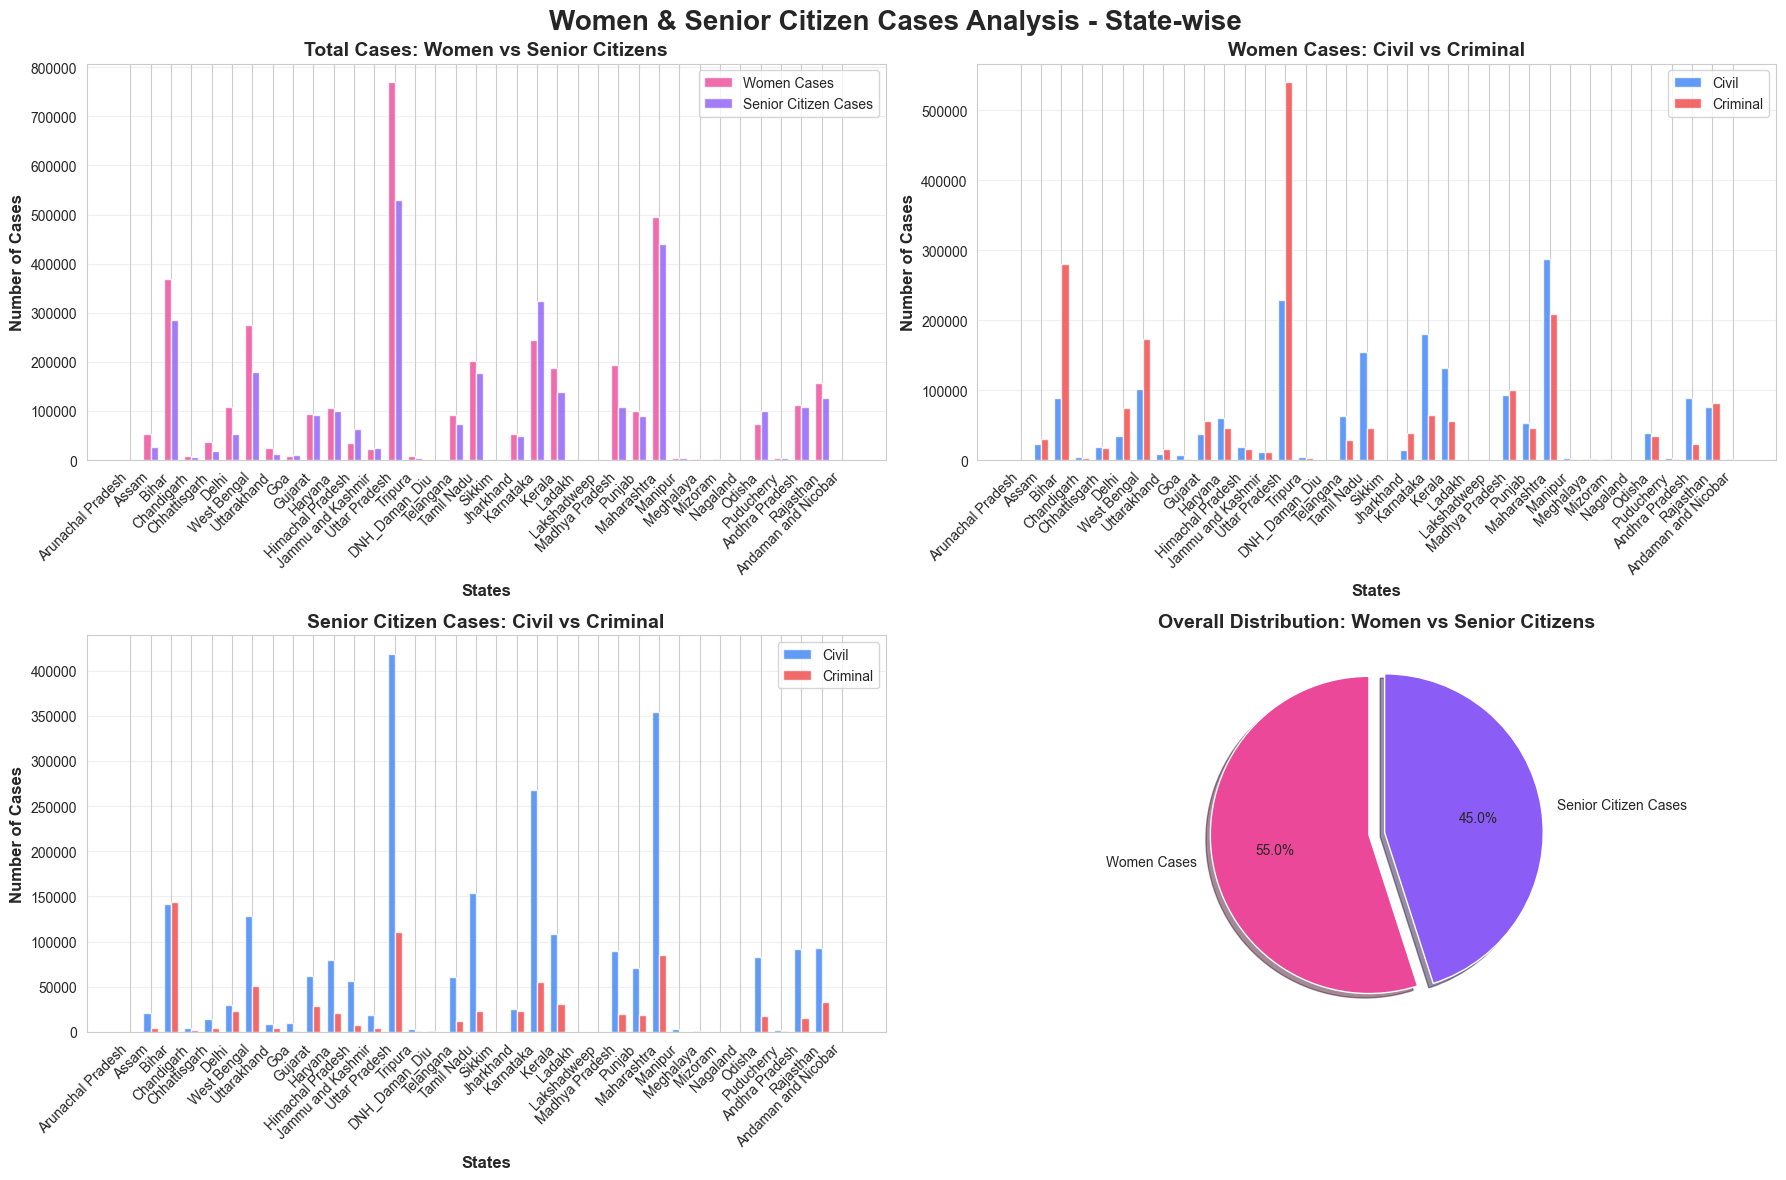

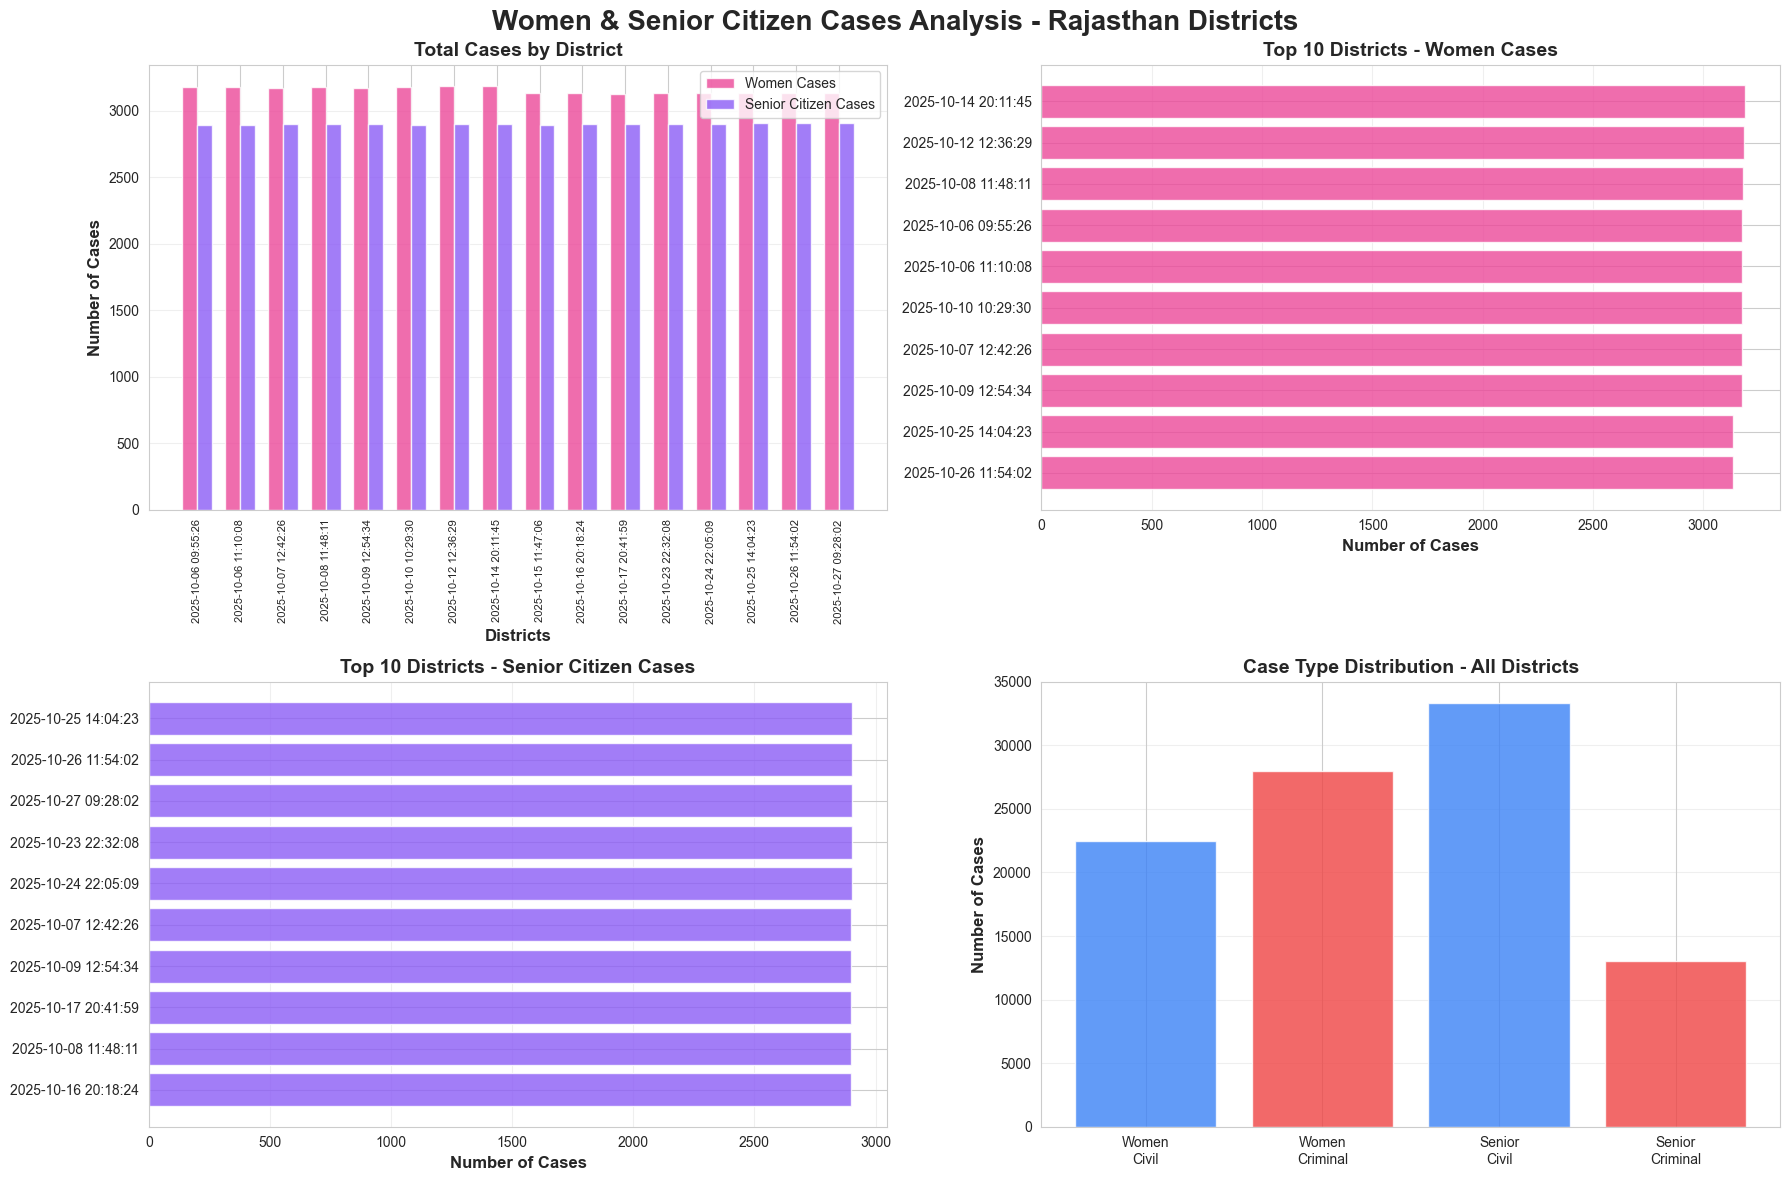

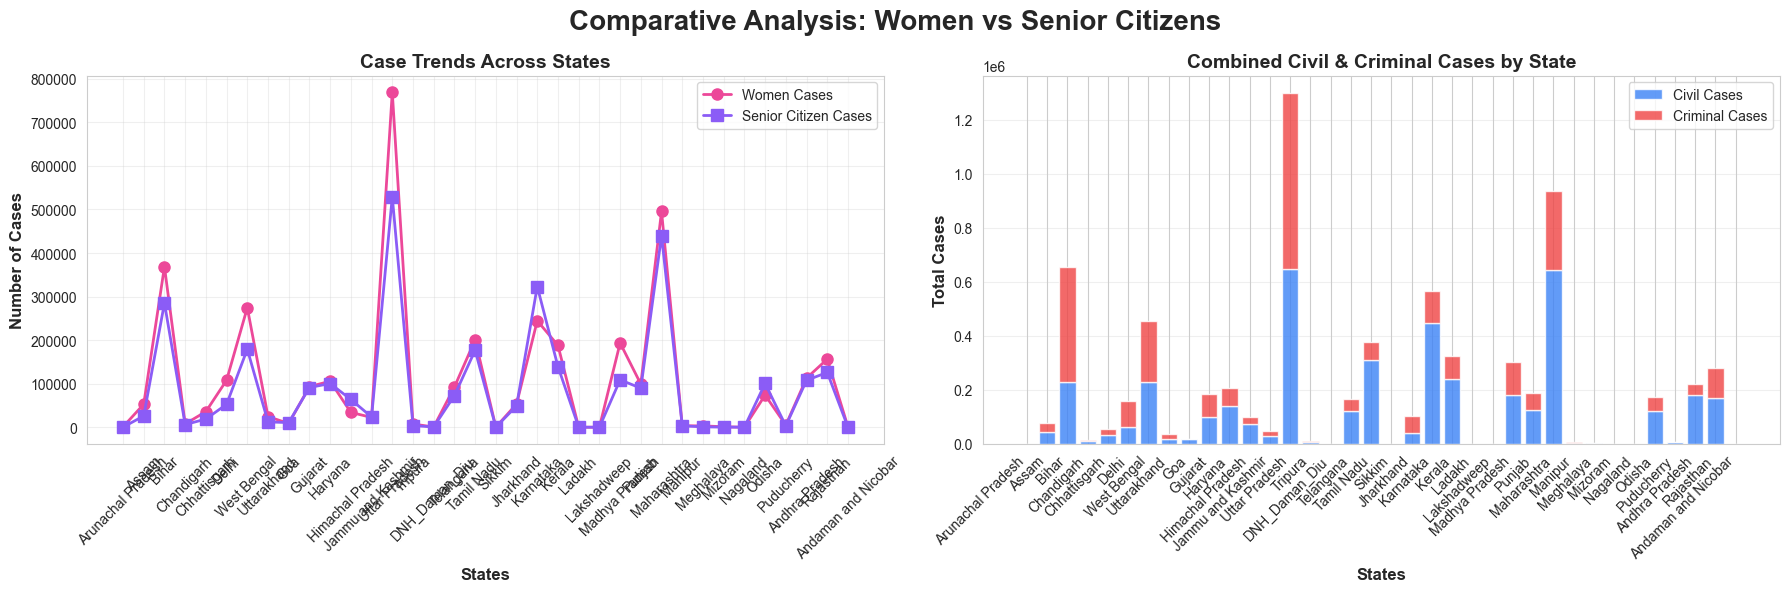


SUMMARY STATISTICS

STATE-WISE TOTALS:
Total Women Cases: 3,838,692
Total Senior Citizen Cases: 3,145,844
Total Women Civil Cases: 1,836,913
Total Women Criminal Cases: 2,001,779
Total Senior Civil Cases: 2,403,725
Total Senior Criminal Cases: 742,119

DISTRICT-WISE TOTALS (RAJASTHAN):
Total Women Cases: 50,485
Total Senior Citizen Cases: 46,381
Total Women Civil Cases: 22,509
Total Women Criminal Cases: 27,976
Total Senior Civil Cases: 33,348
Total Senior Criminal Cases: 13,033

TOP 5 STATES - WOMEN CASES:
            State  Women - Total
13  Uttar Pradesh         769012
26    Maharashtra         495445
2           Bihar         368572
6     West Bengal         274489
20      Karnataka         244464

TOP 5 STATES - SENIOR CITIZEN CASES:
            State  Senior - Total
13  Uttar Pradesh          528849
26    Maharashtra          439825
20      Karnataka          323045
2           Bihar          285178
6     West Bengal          179177

TOP 5 DISTRICTS - WOMEN CASES:
              

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# ==== UPDATE THESE FILE PATHS WITH YOUR ACTUAL FILE NAMES ====
state_filename = r"C:\Users\Admin\Downloads\States.xlsx"
district_filename = r"C:\Users\Admin\Downloads\Rajasthan_data.xlsx"
# Read State-wise data (all sheets)
print("="*60)
print("PROCESSING STATE-WISE DATA")
print("="*60)

state_excel = pd.ExcelFile(state_filename)
state_sheets = state_excel.sheet_names
print(f"Found {len(state_sheets)} states: {', '.join(state_sheets)}")

# Collect data from all states
state_data_list = []

for sheet in state_sheets:
    df = pd.read_excel(state_filename, sheet_name=sheet)
    
    # Get the latest record (last row)
    if len(df) > 0:
        latest = df.iloc[-1]
        state_data_list.append({
            'State': sheet,
            'Women - Civil': int(latest.get('Cases Filed By Woman - Civil', 0)),
            'Women - Criminal': int(latest.get('Cases Filed By Woman - Criminal', 0)),
            'Women - Total': int(latest.get('Cases Filed By Woman - Total', 0)),
            'Senior - Civil': int(latest.get('Cases Filed By Senior Citizen - Civil', 0)),
            'Senior - Criminal': int(latest.get('Cases Filed By Senior Citizen - Criminal', 0)),
            'Senior - Total': int(latest.get('Cases Filed By Senior Citizen - Total', 0))
        })

state_df = pd.DataFrame(state_data_list)
print(f"\nState Data Summary:")
print(state_df)

# Read Rajasthan District-wise data
print("\n" + "="*60)
print("PROCESSING RAJASTHAN DISTRICT-WISE DATA")
print("="*60)

district_df = pd.read_excel(district_filename)

# Create district summary
district_summary = pd.DataFrame({
    'District': district_df.iloc[:, 0],  # Assuming first column is district name
    'Women - Civil': pd.to_numeric(district_df['Cases Filed By Woman - Civil'], errors='coerce').fillna(0).astype(int),
    'Women - Criminal': pd.to_numeric(district_df['Cases Filed By Woman - Criminal'], errors='coerce').fillna(0).astype(int),
    'Women - Total': pd.to_numeric(district_df['Cases Filed By Woman - Total'], errors='coerce').fillna(0).astype(int),
    'Senior - Civil': pd.to_numeric(district_df['Cases Filed By Senior Citizen - Civil'], errors='coerce').fillna(0).astype(int),
    'Senior - Criminal': pd.to_numeric(district_df['Cases Filed By Senior Citizen - Criminal'], errors='coerce').fillna(0).astype(int),
    'Senior - Total': pd.to_numeric(district_df['Cases Filed By Senior Citizen - Total'], errors='coerce').fillna(0).astype(int)
})

print(f"\nDistrict Data Summary:")
print(district_summary.head(10))

# ==================== VISUALIZATION 1: State-wise Comparison ====================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Women & Senior Citizen Cases Analysis - State-wise', fontsize=20, fontweight='bold')

# Plot 1: Total cases by state
ax1 = axes[0, 0]
x = np.arange(len(state_df))
width = 0.35
ax1.bar(x - width/2, state_df['Women - Total'], width, label='Women Cases', color='#ec4899', alpha=0.8)
ax1.bar(x + width/2, state_df['Senior - Total'], width, label='Senior Citizen Cases', color='#8b5cf6', alpha=0.8)
ax1.set_xlabel('States', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax1.set_title('Total Cases: Women vs Senior Citizens', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(state_df['State'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Civil vs Criminal breakdown for Women
ax2 = axes[0, 1]
ax2.bar(x - width/2, state_df['Women - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax2.bar(x + width/2, state_df['Women - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax2.set_xlabel('States', fontweight='bold', fontsize=12)
ax2.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax2.set_title('Women Cases: Civil vs Criminal', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(state_df['State'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Civil vs Criminal breakdown for Senior Citizens
ax3 = axes[1, 0]
ax3.bar(x - width/2, state_df['Senior - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax3.bar(x + width/2, state_df['Senior - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax3.set_xlabel('States', fontweight='bold', fontsize=12)
ax3.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax3.set_title('Senior Citizen Cases: Civil vs Criminal', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(state_df['State'], rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Pie chart - Overall distribution
ax4 = axes[1, 1]
total_women = state_df['Women - Total'].sum()
total_senior = state_df['Senior - Total'].sum()
sizes = [total_women, total_senior]
colors = ['#ec4899', '#8b5cf6']
explode = (0.05, 0.05)
ax4.pie(sizes, explode=explode, labels=['Women Cases', 'Senior Citizen Cases'], 
        colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.set_title('Overall Distribution: Women vs Senior Citizens', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ==================== VISUALIZATION 2: District-wise Analysis ====================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Women & Senior Citizen Cases Analysis - Rajasthan Districts', fontsize=20, fontweight='bold')

# Plot 1: Total cases by district
ax1 = axes[0, 0]
x = np.arange(len(district_summary))
width = 0.35
ax1.bar(x - width/2, district_summary['Women - Total'], width, label='Women Cases', color='#ec4899', alpha=0.8)
ax1.bar(x + width/2, district_summary['Senior - Total'], width, label='Senior Citizen Cases', color='#8b5cf6', alpha=0.8)
ax1.set_xlabel('Districts', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax1.set_title('Total Cases by District', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(district_summary['District'], rotation=90, fontsize=8)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Top 10 districts - Women cases
ax2 = axes[0, 1]
top_women = district_summary.nlargest(10, 'Women - Total')
ax2.barh(top_women['District'], top_women['Women - Total'], color='#ec4899', alpha=0.8)
ax2.set_xlabel('Number of Cases', fontweight='bold', fontsize=12)
ax2.set_title('Top 10 Districts - Women Cases', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

# Plot 3: Top 10 districts - Senior Citizen cases
ax3 = axes[1, 0]
top_senior = district_summary.nlargest(10, 'Senior - Total')
ax3.barh(top_senior['District'], top_senior['Senior - Total'], color='#8b5cf6', alpha=0.8)
ax3.set_xlabel('Number of Cases', fontweight='bold', fontsize=12)
ax3.set_title('Top 10 Districts - Senior Citizen Cases', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.invert_yaxis()

# Plot 4: Civil vs Criminal breakdown for districts
ax4 = axes[1, 1]
total_women_civil = district_summary['Women - Civil'].sum()
total_women_criminal = district_summary['Women - Criminal'].sum()
total_senior_civil = district_summary['Senior - Civil'].sum()
total_senior_criminal = district_summary['Senior - Criminal'].sum()

categories = ['Women\nCivil', 'Women\nCriminal', 'Senior\nCivil', 'Senior\nCriminal']
values = [total_women_civil, total_women_criminal, total_senior_civil, total_senior_criminal]
colors_bar = ['#3b82f6', '#ef4444', '#3b82f6', '#ef4444']

ax4.bar(categories, values, color=colors_bar, alpha=0.8)
ax4.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax4.set_title('Case Type Distribution - All Districts', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== VISUALIZATION 3: Comparative Analysis ====================
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparative Analysis: Women vs Senior Citizens', fontsize=20, fontweight='bold')

# Plot 1: Line plot showing trends
ax1 = axes[0]
ax1.plot(state_df['State'], state_df['Women - Total'], marker='o', linewidth=2, 
         markersize=8, label='Women Cases', color='#ec4899')
ax1.plot(state_df['State'], state_df['Senior - Total'], marker='s', linewidth=2, 
         markersize=8, label='Senior Citizen Cases', color='#8b5cf6')
ax1.set_xlabel('States', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)
ax1.set_title('Case Trends Across States', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Stacked bar chart
ax2 = axes[1]
civil_total = state_df['Women - Civil'] + state_df['Senior - Civil']
criminal_total = state_df['Women - Criminal'] + state_df['Senior - Criminal']

x = np.arange(len(state_df))
ax2.bar(x, civil_total, label='Civil Cases', color='#3b82f6', alpha=0.8)
ax2.bar(x, criminal_total, bottom=civil_total, label='Criminal Cases', color='#ef4444', alpha=0.8)
ax2.set_xlabel('States', fontweight='bold', fontsize=12)
ax2.set_ylabel('Total Cases', fontweight='bold', fontsize=12)
ax2.set_title('Combined Civil & Criminal Cases by State', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(state_df['State'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== SUMMARY STATISTICS ====================
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\nSTATE-WISE TOTALS:")
print(f"Total Women Cases: {state_df['Women - Total'].sum():,}")
print(f"Total Senior Citizen Cases: {state_df['Senior - Total'].sum():,}")
print(f"Total Women Civil Cases: {state_df['Women - Civil'].sum():,}")
print(f"Total Women Criminal Cases: {state_df['Women - Criminal'].sum():,}")
print(f"Total Senior Civil Cases: {state_df['Senior - Civil'].sum():,}")
print(f"Total Senior Criminal Cases: {state_df['Senior - Criminal'].sum():,}")

print("\nDISTRICT-WISE TOTALS (RAJASTHAN):")
print(f"Total Women Cases: {district_summary['Women - Total'].sum():,}")
print(f"Total Senior Citizen Cases: {district_summary['Senior - Total'].sum():,}")
print(f"Total Women Civil Cases: {district_summary['Women - Civil'].sum():,}")
print(f"Total Women Criminal Cases: {district_summary['Women - Criminal'].sum():,}")
print(f"Total Senior Civil Cases: {district_summary['Senior - Civil'].sum():,}")
print(f"Total Senior Criminal Cases: {district_summary['Senior - Criminal'].sum():,}")

print("\nTOP 5 STATES - WOMEN CASES:")
print(state_df.nlargest(5, 'Women - Total')[['State', 'Women - Total']])

print("\nTOP 5 STATES - SENIOR CITIZEN CASES:")
print(state_df.nlargest(5, 'Senior - Total')[['State', 'Senior - Total']])

print("\nTOP 5 DISTRICTS - WOMEN CASES:")
print(district_summary.nlargest(5, 'Women - Total')[['District', 'Women - Total']])

print("\nTOP 5 DISTRICTS - SENIOR CITIZEN CASES:")
print(district_summary.nlargest(5, 'Senior - Total')[['District', 'Senior - Total']])

print("\n" + "="*60)
print("Analysis Complete!")
print("="*60)

PROCESSING STATE-WISE DATA
Found 36 states: Arunachal Pradesh, Assam, Bihar, Chandigarh, Chhattisgarh, Delhi, West Bengal, Uttarakhand, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu and Kashmir, Uttar Pradesh, Tripura, DNH_Daman_Diu, Telangana, Tamil Nadu, Sikkim, Jharkhand, Karnataka, Kerala, Ladakh, Lakshadweep, Madhya Pradesh, Punjab, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Andhra Pradesh, Rajasthan, Andaman and Nicobar

State Data Summary:
                  State  Women - Civil  Women - Criminal  Women - Total  \
0     Arunachal Pradesh            528               414            942   
1                 Assam          23008             29969          52977   
2                 Bihar          88207            280365         368572   
3            Chandigarh           4799              2800           7599   
4          Chhattisgarh          18048             17901          35949   
5                 Delhi          33763             74212         1079

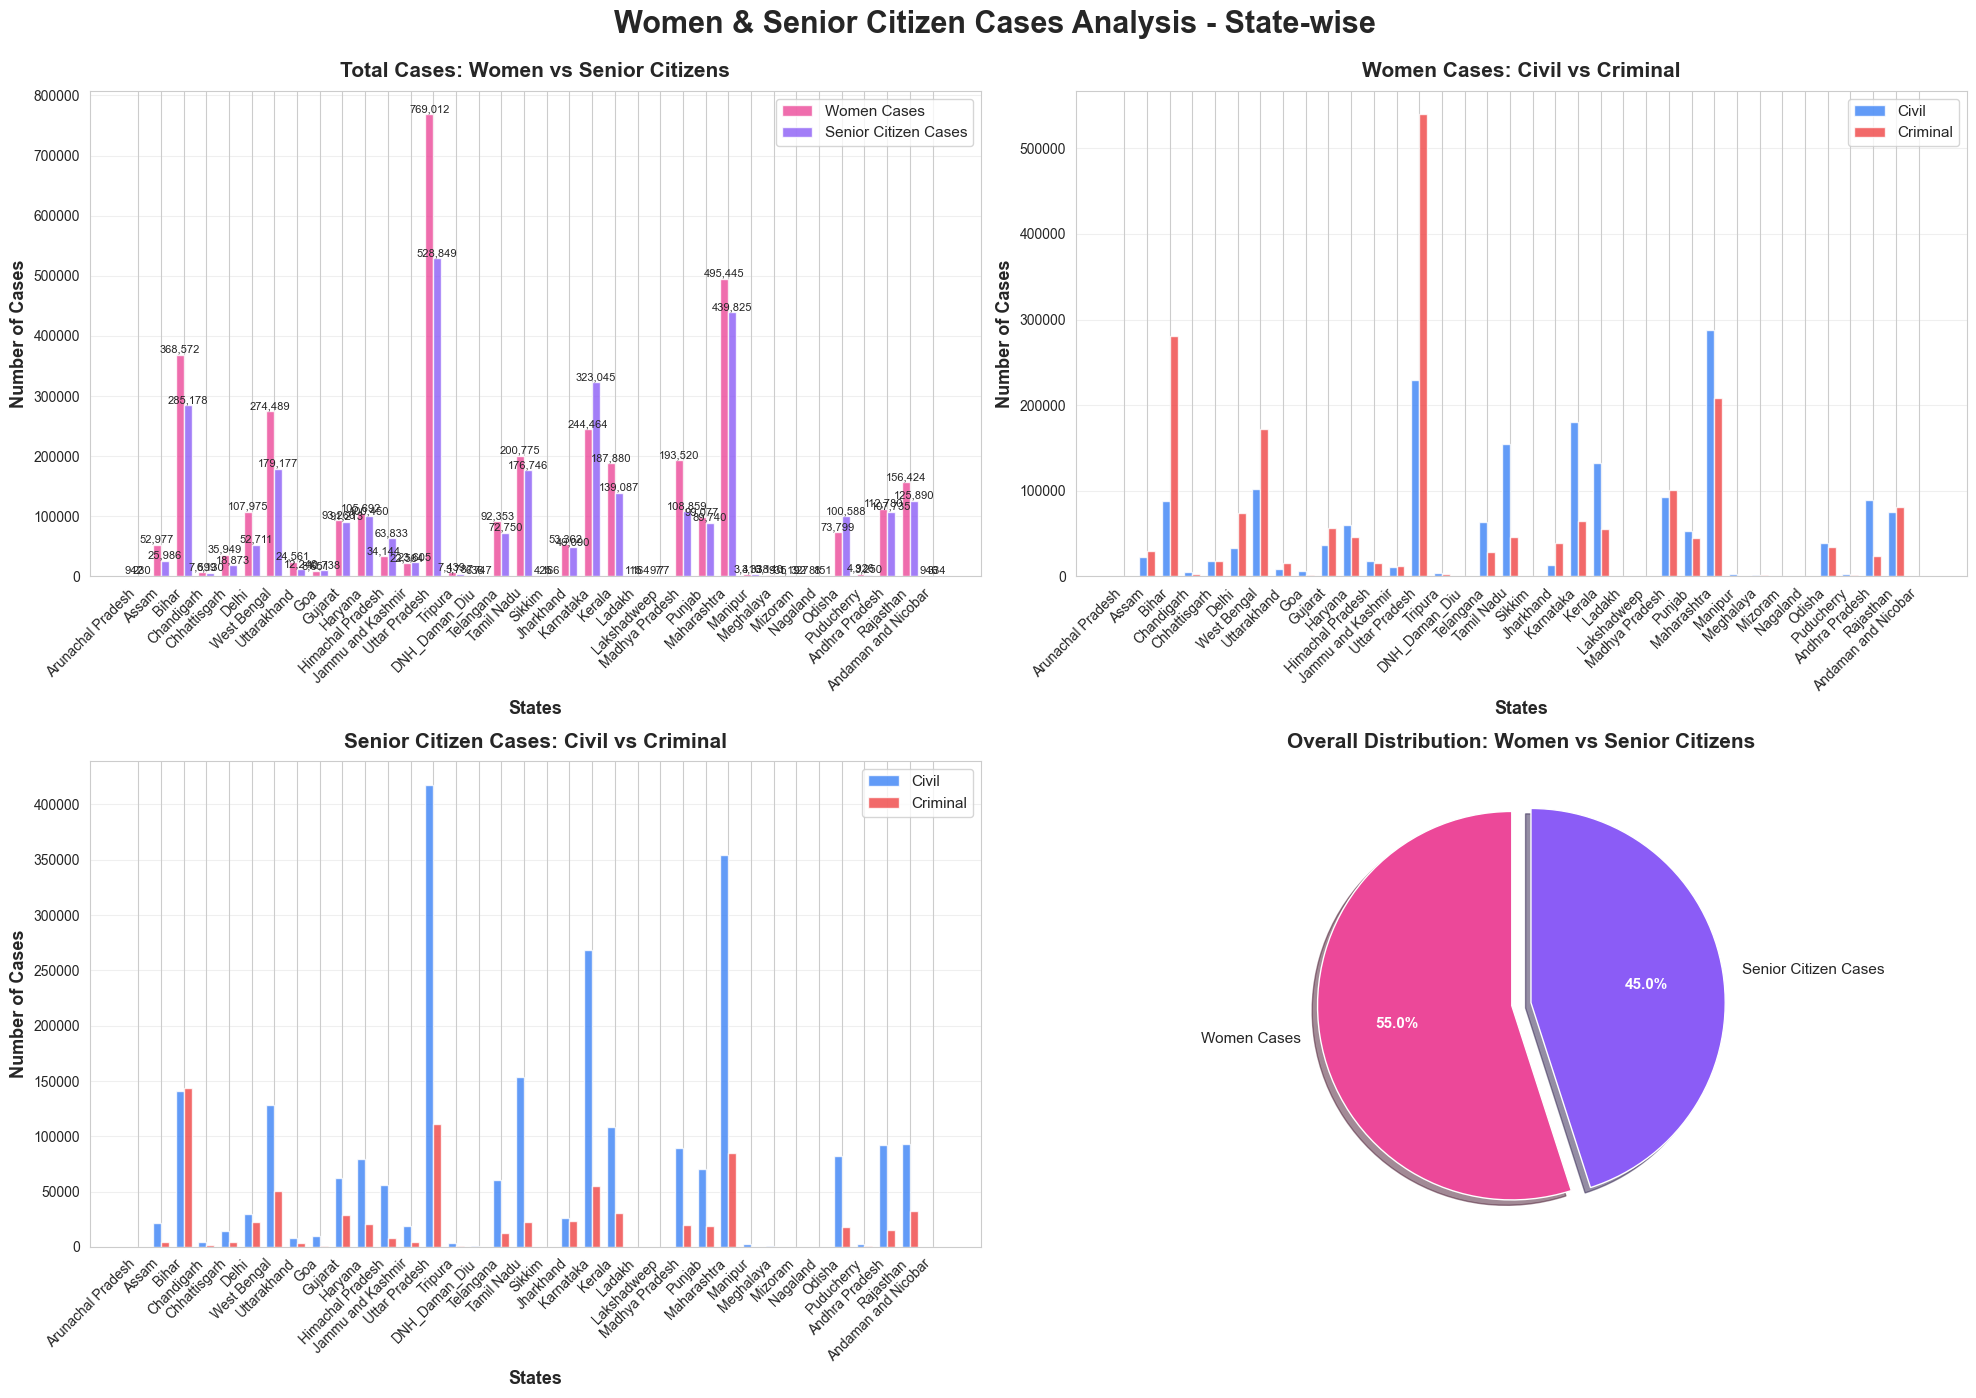

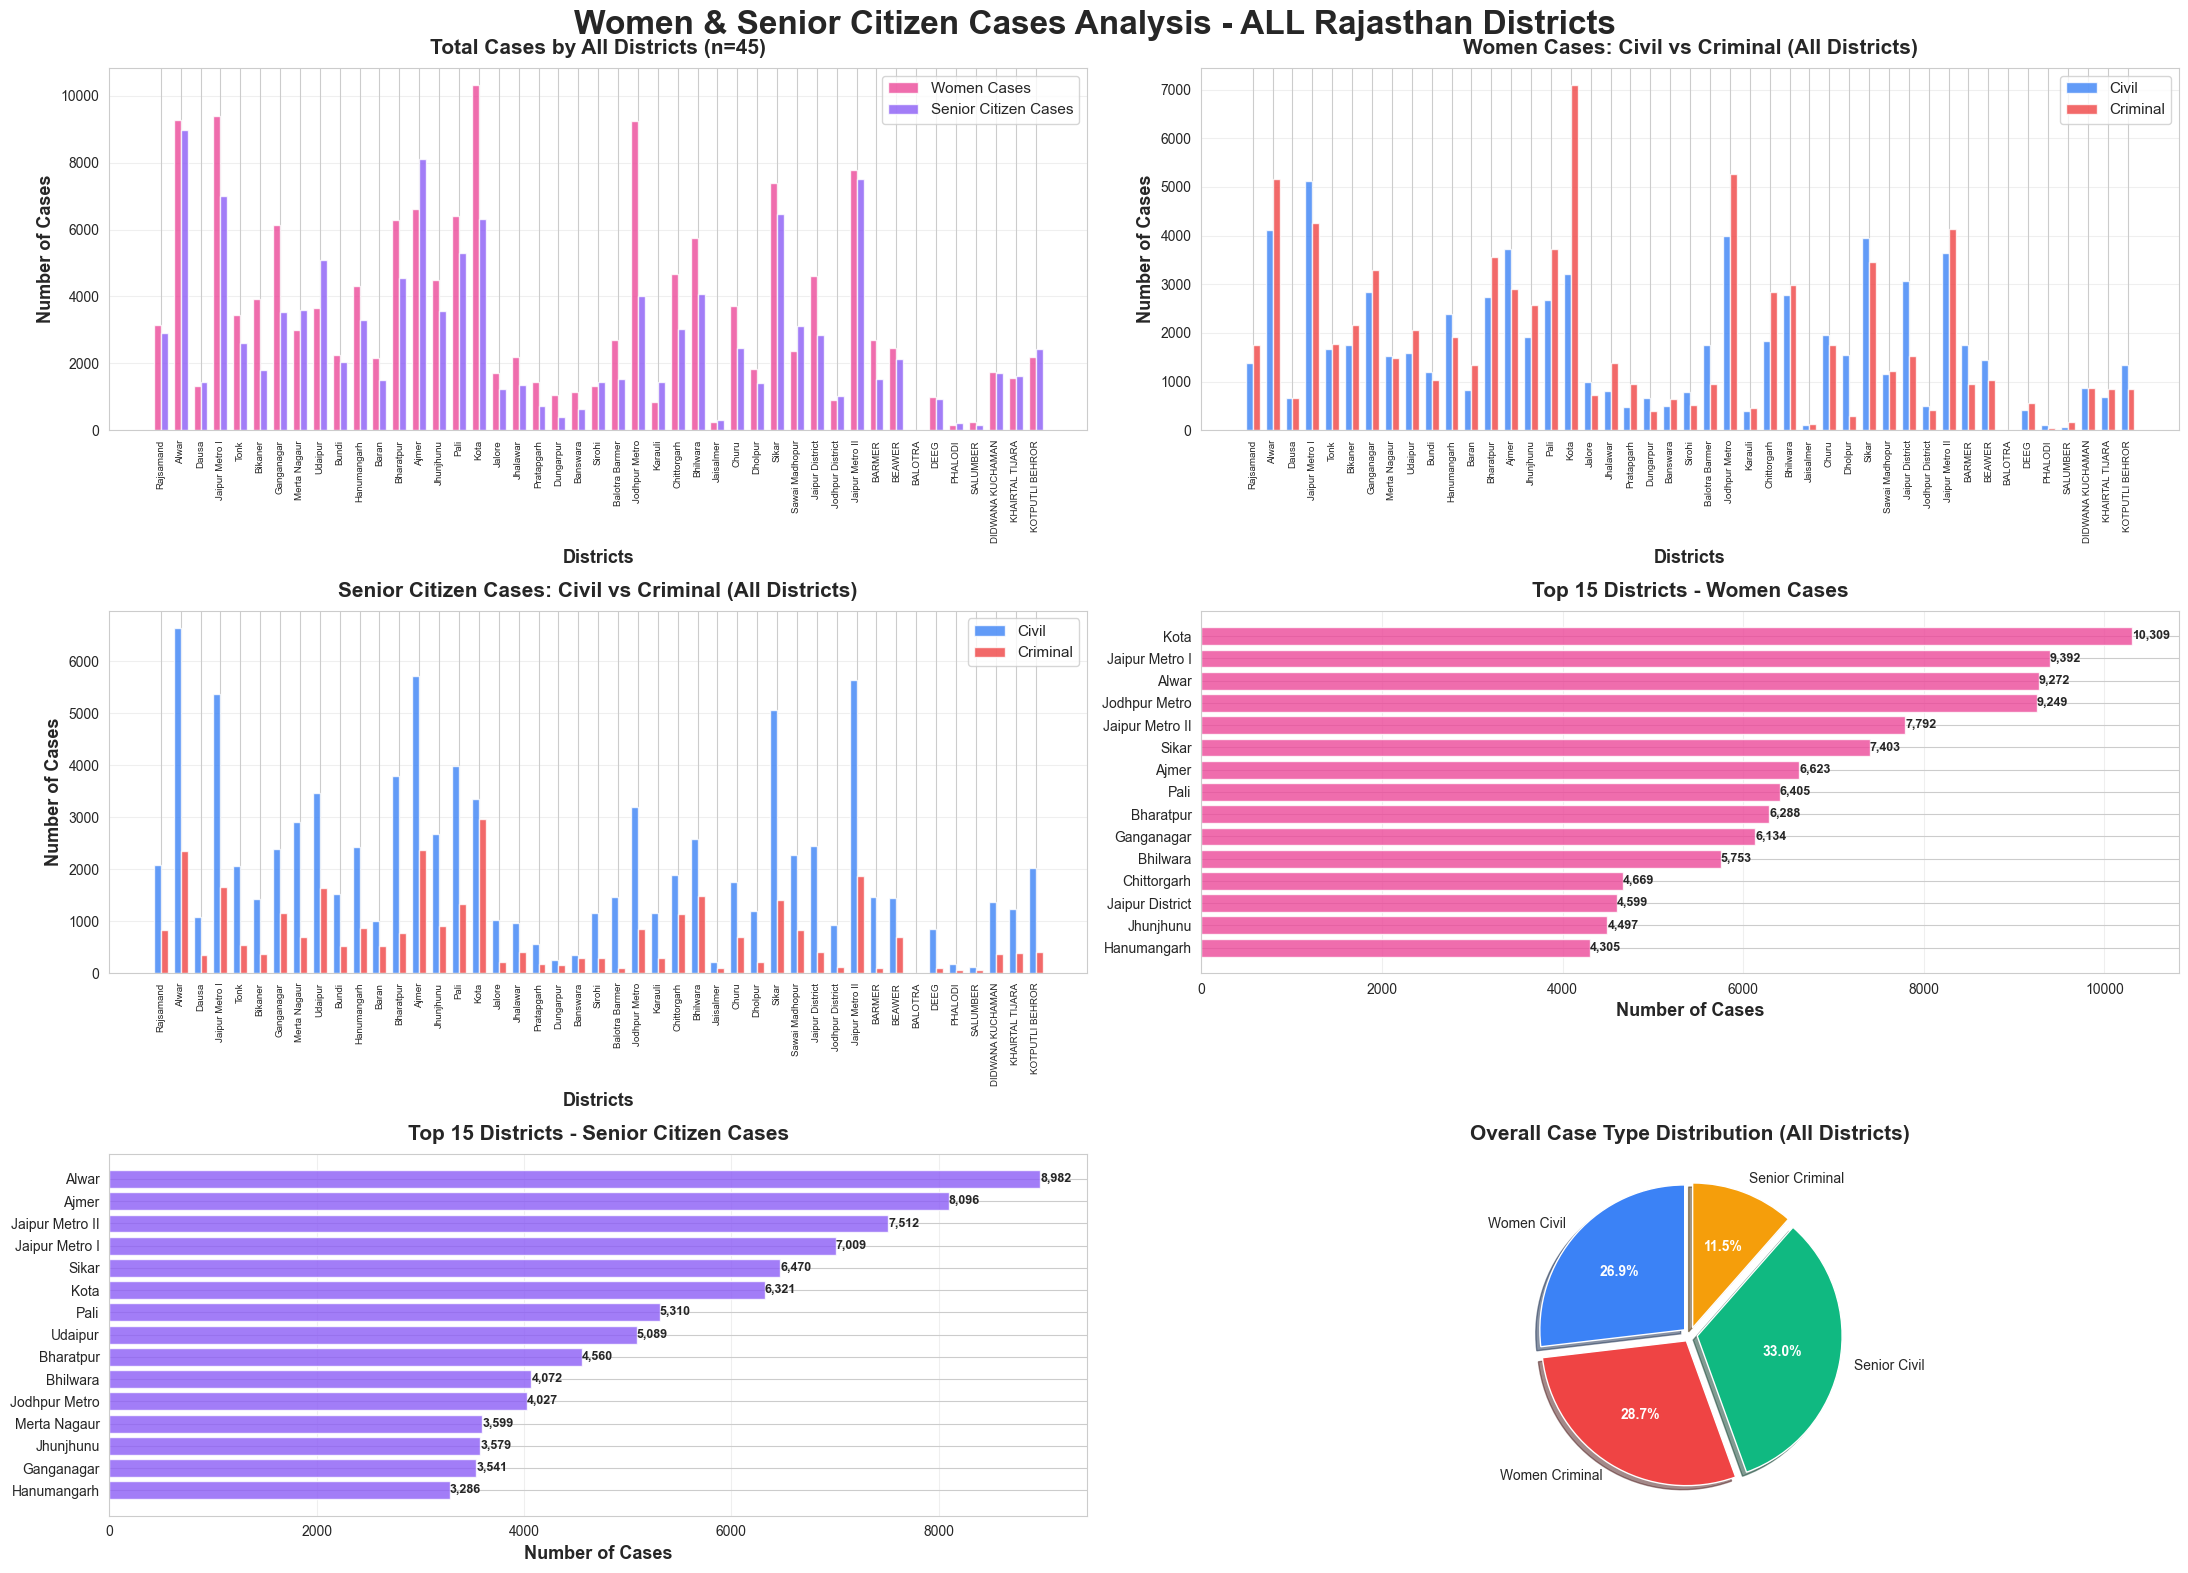

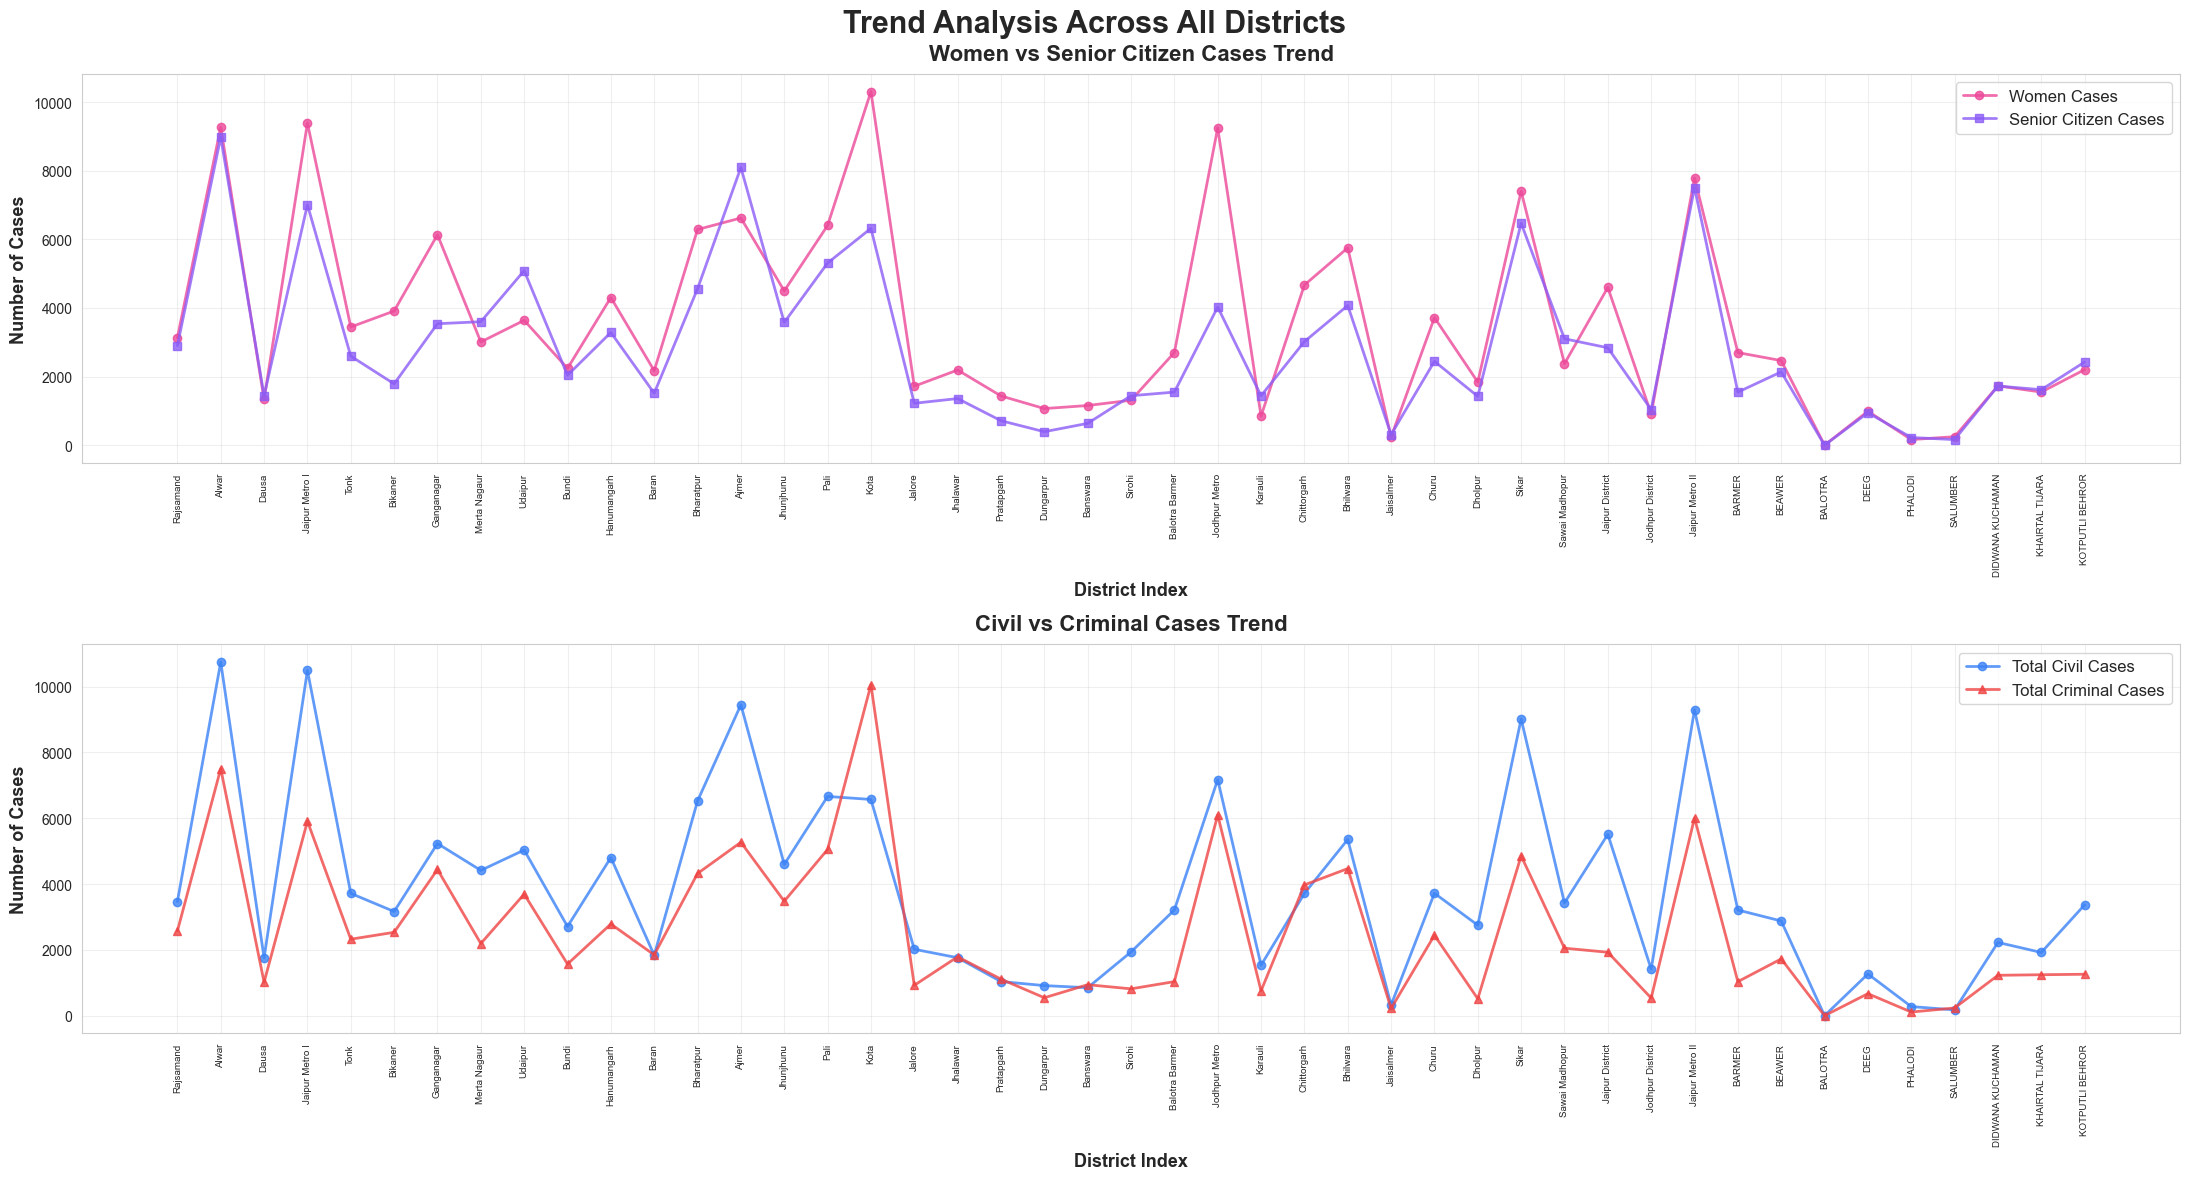


COMPREHENSIVE SUMMARY STATISTICS

STATE-WISE TOTALS:
Total Women Cases: 3,838,692
Total Senior Citizen Cases: 3,145,844
Total Women Civil Cases: 1,836,913
Total Women Criminal Cases: 2,001,779
Total Senior Civil Cases: 2,403,725
Total Senior Criminal Cases: 742,119
Grand Total Cases: 6,984,536

DISTRICT-WISE TOTALS (ALL 45 RAJASTHAN DISTRICTS):
Total Women Cases: 159,124
Total Senior Citizen Cases: 127,437
Total Women Civil Cases: 76,982
Total Women Criminal Cases: 82,142
Total Senior Civil Cases: 94,496
Total Senior Criminal Cases: 32,941
Grand Total Cases: 286,561

TOP 10 STATES - WOMEN CASES:
             State  Women - Total  Women - Civil  Women - Criminal
13   Uttar Pradesh         769012         228988            540024
26     Maharashtra         495445         287292            208153
2            Bihar         368572          88207            280365
6      West Bengal         274489         102017            172472
20       Karnataka         244464         179952             

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# ==== UPDATE THESE FILE PATHS WITH YOUR ACTUAL FILE NAMES ====
state_filename = r"C:\Users\Admin\Downloads\States.xlsx"
district_filename = r"C:\Users\Admin\Downloads\Rajasthan_data.xlsx"

# Read State-wise data (all sheets)
print("="*60)
print("PROCESSING STATE-WISE DATA")
print("="*60)

state_excel = pd.ExcelFile(state_filename)
state_sheets = state_excel.sheet_names
print(f"Found {len(state_sheets)} states: {', '.join(state_sheets)}")

# Collect data from all states
state_data_list = []

for sheet in state_sheets:
    df = pd.read_excel(state_filename, sheet_name=sheet)
    
    # Get the latest record (last row)
    if len(df) > 0:
        latest = df.iloc[-1]
        state_data_list.append({
            'State': sheet,
            'Women - Civil': int(latest.get('Cases Filed By Woman - Civil', 0)),
            'Women - Criminal': int(latest.get('Cases Filed By Woman - Criminal', 0)),
            'Women - Total': int(latest.get('Cases Filed By Woman - Total', 0)),
            'Senior - Civil': int(latest.get('Cases Filed By Senior Citizen - Civil', 0)),
            'Senior - Criminal': int(latest.get('Cases Filed By Senior Citizen - Criminal', 0)),
            'Senior - Total': int(latest.get('Cases Filed By Senior Citizen - Total', 0))
        })

state_df = pd.DataFrame(state_data_list)
print(f"\nState Data Summary:")
print(state_df)

# Read Rajasthan District-wise data
print("\n" + "="*60)
print("PROCESSING RAJASTHAN DISTRICT-WISE DATA")
print("="*60)

# Read all sheets from district file
district_excel = pd.ExcelFile(district_filename)
district_sheets = district_excel.sheet_names
print(f"Found {len(district_sheets)} sheets in Rajasthan file: {', '.join(district_sheets)}")

# Collect data from all districts
district_data_list = []

for sheet in district_sheets:
    df = pd.read_excel(district_filename, sheet_name=sheet)
    
    # Get the latest record (last row) for each district
    if len(df) > 0:
        latest = df.iloc[-1]
        district_data_list.append({
            'District': sheet,
            'Women - Civil': int(latest.get('Cases Filed By Woman - Civil', 0)),
            'Women - Criminal': int(latest.get('Cases Filed By Woman - Criminal', 0)),
            'Women - Total': int(latest.get('Cases Filed By Woman - Total', 0)),
            'Senior - Civil': int(latest.get('Cases Filed By Senior Citizen - Civil', 0)),
            'Senior - Criminal': int(latest.get('Cases Filed By Senior Citizen - Criminal', 0)),
            'Senior - Total': int(latest.get('Cases Filed By Senior Citizen - Total', 0))
        })

district_summary = pd.DataFrame(district_data_list)
print(f"\nDistrict Data Summary:")
print(district_summary)
print(f"\nTotal Districts: {len(district_summary)}")

# ==================== VISUALIZATION 1: State-wise Comparison ====================
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Women & Senior Citizen Cases Analysis - State-wise', fontsize=22, fontweight='bold', y=0.995)

# Plot 1: Total cases by state
ax1 = axes[0, 0]
x = np.arange(len(state_df))
width = 0.35
bars1 = ax1.bar(x - width/2, state_df['Women - Total'], width, label='Women Cases', color='#ec4899', alpha=0.8)
bars2 = ax1.bar(x + width/2, state_df['Senior - Total'], width, label='Senior Citizen Cases', color='#8b5cf6', alpha=0.8)
ax1.set_xlabel('States', fontweight='bold', fontsize=13)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax1.set_title('Total Cases: Women vs Senior Citizens', fontsize=15, fontweight='bold', pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(state_df['State'], rotation=45, ha='right', fontsize=10)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Plot 2: Civil vs Criminal breakdown for Women
ax2 = axes[0, 1]
ax2.bar(x - width/2, state_df['Women - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax2.bar(x + width/2, state_df['Women - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax2.set_xlabel('States', fontweight='bold', fontsize=13)
ax2.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax2.set_title('Women Cases: Civil vs Criminal', fontsize=15, fontweight='bold', pad=10)
ax2.set_xticks(x)
ax2.set_xticklabels(state_df['State'], rotation=45, ha='right', fontsize=10)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Civil vs Criminal breakdown for Senior Citizens
ax3 = axes[1, 0]
ax3.bar(x - width/2, state_df['Senior - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax3.bar(x + width/2, state_df['Senior - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax3.set_xlabel('States', fontweight='bold', fontsize=13)
ax3.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax3.set_title('Senior Citizen Cases: Civil vs Criminal', fontsize=15, fontweight='bold', pad=10)
ax3.set_xticks(x)
ax3.set_xticklabels(state_df['State'], rotation=45, ha='right', fontsize=10)
ax3.legend(fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Pie chart - Overall distribution
ax4 = axes[1, 1]
total_women = state_df['Women - Total'].sum()
total_senior = state_df['Senior - Total'].sum()
sizes = [total_women, total_senior]
colors = ['#ec4899', '#8b5cf6']
explode = (0.05, 0.05)
wedges, texts, autotexts = ax4.pie(sizes, explode=explode, labels=['Women Cases', 'Senior Citizen Cases'], 
        colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 11})
ax4.set_title('Overall Distribution: Women vs Senior Citizens', fontsize=15, fontweight='bold', pad=10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ==================== VISUALIZATION 2: District-wise Analysis (ALL DISTRICTS) ====================
fig = plt.figure(figsize=(22, 16))
fig.suptitle('Women & Senior Citizen Cases Analysis - ALL Rajasthan Districts', fontsize=24, fontweight='bold')

# Plot 1: Total cases by ALL districts - Main comparison
ax1 = plt.subplot(3, 2, 1)
x = np.arange(len(district_summary))
width = 0.35
bars1 = ax1.bar(x - width/2, district_summary['Women - Total'], width, label='Women Cases', color='#ec4899', alpha=0.8)
bars2 = ax1.bar(x + width/2, district_summary['Senior - Total'], width, label='Senior Citizen Cases', color='#8b5cf6', alpha=0.8)
ax1.set_xlabel('Districts', fontweight='bold', fontsize=13)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax1.set_title(f'Total Cases by All Districts (n={len(district_summary)})', fontsize=15, fontweight='bold', pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(district_summary['District'], rotation=90, fontsize=7)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Women Cases - Civil vs Criminal for ALL districts
ax2 = plt.subplot(3, 2, 2)
ax2.bar(x - width/2, district_summary['Women - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax2.bar(x + width/2, district_summary['Women - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax2.set_xlabel('Districts', fontweight='bold', fontsize=13)
ax2.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax2.set_title('Women Cases: Civil vs Criminal (All Districts)', fontsize=15, fontweight='bold', pad=10)
ax2.set_xticks(x)
ax2.set_xticklabels(district_summary['District'], rotation=90, fontsize=7)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Senior Citizen Cases - Civil vs Criminal for ALL districts
ax3 = plt.subplot(3, 2, 3)
ax3.bar(x - width/2, district_summary['Senior - Civil'], width, label='Civil', color='#3b82f6', alpha=0.8)
ax3.bar(x + width/2, district_summary['Senior - Criminal'], width, label='Criminal', color='#ef4444', alpha=0.8)
ax3.set_xlabel('Districts', fontweight='bold', fontsize=13)
ax3.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax3.set_title('Senior Citizen Cases: Civil vs Criminal (All Districts)', fontsize=15, fontweight='bold', pad=10)
ax3.set_xticks(x)
ax3.set_xticklabels(district_summary['District'], rotation=90, fontsize=7)
ax3.legend(fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Top 15 districts - Women cases
ax4 = plt.subplot(3, 2, 4)
top_women = district_summary.nlargest(15, 'Women - Total').sort_values('Women - Total', ascending=True)
bars = ax4.barh(top_women['District'], top_women['Women - Total'], color='#ec4899', alpha=0.8)
ax4.set_xlabel('Number of Cases', fontweight='bold', fontsize=13)
ax4.set_title('Top 15 Districts - Women Cases', fontsize=15, fontweight='bold', pad=10)
ax4.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width_val = bar.get_width()
    ax4.text(width_val, bar.get_y() + bar.get_height()/2., f'{int(width_val):,}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 5: Top 15 districts - Senior Citizen cases
ax5 = plt.subplot(3, 2, 5)
top_senior = district_summary.nlargest(15, 'Senior - Total').sort_values('Senior - Total', ascending=True)
bars = ax5.barh(top_senior['District'], top_senior['Senior - Total'], color='#8b5cf6', alpha=0.8)
ax5.set_xlabel('Number of Cases', fontweight='bold', fontsize=13)
ax5.set_title('Top 15 Districts - Senior Citizen Cases', fontsize=15, fontweight='bold', pad=10)
ax5.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width_val = bar.get_width()
    ax5.text(width_val, bar.get_y() + bar.get_height()/2., f'{int(width_val):,}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 6: Overall breakdown pie chart
ax6 = plt.subplot(3, 2, 6)
total_women_civil = district_summary['Women - Civil'].sum()
total_women_criminal = district_summary['Women - Criminal'].sum()
total_senior_civil = district_summary['Senior - Civil'].sum()
total_senior_criminal = district_summary['Senior - Criminal'].sum()

sizes = [total_women_civil, total_women_criminal, total_senior_civil, total_senior_criminal]
labels = ['Women Civil', 'Women Criminal', 'Senior Civil', 'Senior Criminal']
colors_pie = ['#3b82f6', '#ef4444', '#10b981', '#f59e0b']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax6.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10})
ax6.set_title('Overall Case Type Distribution (All Districts)', fontsize=15, fontweight='bold', pad=10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ==================== VISUALIZATION 3: Comparative Line Charts ====================
fig, axes = plt.subplots(2, 1, figsize=(22, 12))
fig.suptitle('Trend Analysis Across All Districts', fontsize=22, fontweight='bold')

# Plot 1: Women vs Senior Citizens trend
ax1 = axes[0]
ax1.plot(range(len(district_summary)), district_summary['Women - Total'], marker='o', linewidth=2, 
         markersize=6, label='Women Cases', color='#ec4899', alpha=0.8)
ax1.plot(range(len(district_summary)), district_summary['Senior - Total'], marker='s', linewidth=2, 
         markersize=6, label='Senior Citizen Cases', color='#8b5cf6', alpha=0.8)
ax1.set_xlabel('District Index', fontweight='bold', fontsize=13)
ax1.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax1.set_title('Women vs Senior Citizen Cases Trend', fontsize=16, fontweight='bold', pad=10)
ax1.set_xticks(range(len(district_summary)))
ax1.set_xticklabels(district_summary['District'], rotation=90, fontsize=7)
ax1.legend(fontsize=12)
ax1.grid(alpha=0.3)

# Plot 2: Civil vs Criminal trend
ax2 = axes[1]
total_civil = district_summary['Women - Civil'] + district_summary['Senior - Civil']
total_criminal = district_summary['Women - Criminal'] + district_summary['Senior - Criminal']
ax2.plot(range(len(district_summary)), total_civil, marker='o', linewidth=2, 
         markersize=6, label='Total Civil Cases', color='#3b82f6', alpha=0.8)
ax2.plot(range(len(district_summary)), total_criminal, marker='^', linewidth=2, 
         markersize=6, label='Total Criminal Cases', color='#ef4444', alpha=0.8)
ax2.set_xlabel('District Index', fontweight='bold', fontsize=13)
ax2.set_ylabel('Number of Cases', fontweight='bold', fontsize=13)
ax2.set_title('Civil vs Criminal Cases Trend', fontsize=16, fontweight='bold', pad=10)
ax2.set_xticks(range(len(district_summary)))
ax2.set_xticklabels(district_summary['District'], rotation=90, fontsize=7)
ax2.legend(fontsize=12)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== SUMMARY STATISTICS ====================
print("\n" + "="*70)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("="*70)

print("\n" + "="*70)
print("STATE-WISE TOTALS:")
print("="*70)
print(f"Total Women Cases: {state_df['Women - Total'].sum():,}")
print(f"Total Senior Citizen Cases: {state_df['Senior - Total'].sum():,}")
print(f"Total Women Civil Cases: {state_df['Women - Civil'].sum():,}")
print(f"Total Women Criminal Cases: {state_df['Women - Criminal'].sum():,}")
print(f"Total Senior Civil Cases: {state_df['Senior - Civil'].sum():,}")
print(f"Total Senior Criminal Cases: {state_df['Senior - Criminal'].sum():,}")
print(f"Grand Total Cases: {state_df['Women - Total'].sum() + state_df['Senior - Total'].sum():,}")

print("\n" + "="*70)
print(f"DISTRICT-WISE TOTALS (ALL {len(district_summary)} RAJASTHAN DISTRICTS):")
print("="*70)
print(f"Total Women Cases: {district_summary['Women - Total'].sum():,}")
print(f"Total Senior Citizen Cases: {district_summary['Senior - Total'].sum():,}")
print(f"Total Women Civil Cases: {district_summary['Women - Civil'].sum():,}")
print(f"Total Women Criminal Cases: {district_summary['Women - Criminal'].sum():,}")
print(f"Total Senior Civil Cases: {district_summary['Senior - Civil'].sum():,}")
print(f"Total Senior Criminal Cases: {district_summary['Senior - Criminal'].sum():,}")
print(f"Grand Total Cases: {district_summary['Women - Total'].sum() + district_summary['Senior - Total'].sum():,}")

print("\n" + "="*70)
print("TOP 10 STATES - WOMEN CASES:")
print("="*70)
print(state_df.nlargest(10, 'Women - Total')[['State', 'Women - Total', 'Women - Civil', 'Women - Criminal']])

print("\n" + "="*70)
print("TOP 10 STATES - SENIOR CITIZEN CASES:")
print("="*70)
print(state_df.nlargest(10, 'Senior - Total')[['State', 'Senior - Total', 'Senior - Civil', 'Senior - Criminal']])

print("\n" + "="*70)
print("TOP 10 DISTRICTS - WOMEN CASES:")
print("="*70)
print(district_summary.nlargest(10, 'Women - Total')[['District', 'Women - Total', 'Women - Civil', 'Women - Criminal']])

print("\n" + "="*70)
print("TOP 10 DISTRICTS - SENIOR CITIZEN CASES:")
print("="*70)
print(district_summary.nlargest(10, 'Senior - Total')[['District', 'Senior - Total', 'Senior - Civil', 'Senior - Criminal']])

print("\n" + "="*70)
print("AVERAGE CASES PER DISTRICT:")
print("="*70)
print(f"Average Women Cases: {district_summary['Women - Total'].mean():.2f}")
print(f"Average Senior Citizen Cases: {district_summary['Senior - Total'].mean():.2f}")
print(f"Average Civil Cases: {(district_summary['Women - Civil'] + district_summary['Senior - Civil']).mean():.2f}")
print(f"Average Criminal Cases: {(district_summary['Women - Criminal'] + district_summary['Senior - Criminal']).mean():.2f}")

print("\n" + "="*70)
print("Analysis Complete! All districts processed successfully.")
print("="*70)

instrituted cases

PROCESSING RAJASTHAN DISTRICT-WISE TIMELINE DATA
Found 46 districts: Rajsamand, Alwar, Dausa, Jaipur Metro I, Tonk, Bikaner, Ganganagar, Merta Nagaur, Udaipur, Bundi, Hanumangarh, Baran, Bharatpur, Ajmer, Jhunjhunu, Pali, Kota, Jalore, Jhalawar, Pratapgarh, Dungarpur, Banswara, Sirohi, Balotra Barmer, Jodhpur Metro, Karauli, Chittorgarh, Bhilwara, Jaisalmer, Churu, Dholpur, Sikar, Sawai Madhopur, Jaipur District, Jodhpur District, Jaipur Metro II, BARMER, BEAWER, BALOTRA, DEEG, PHALODI, SALUMBER, DIDWANA KUCHAMAN, KHAIRTAL TIJARA, Sheet1, KOTPUTLI BEHROR


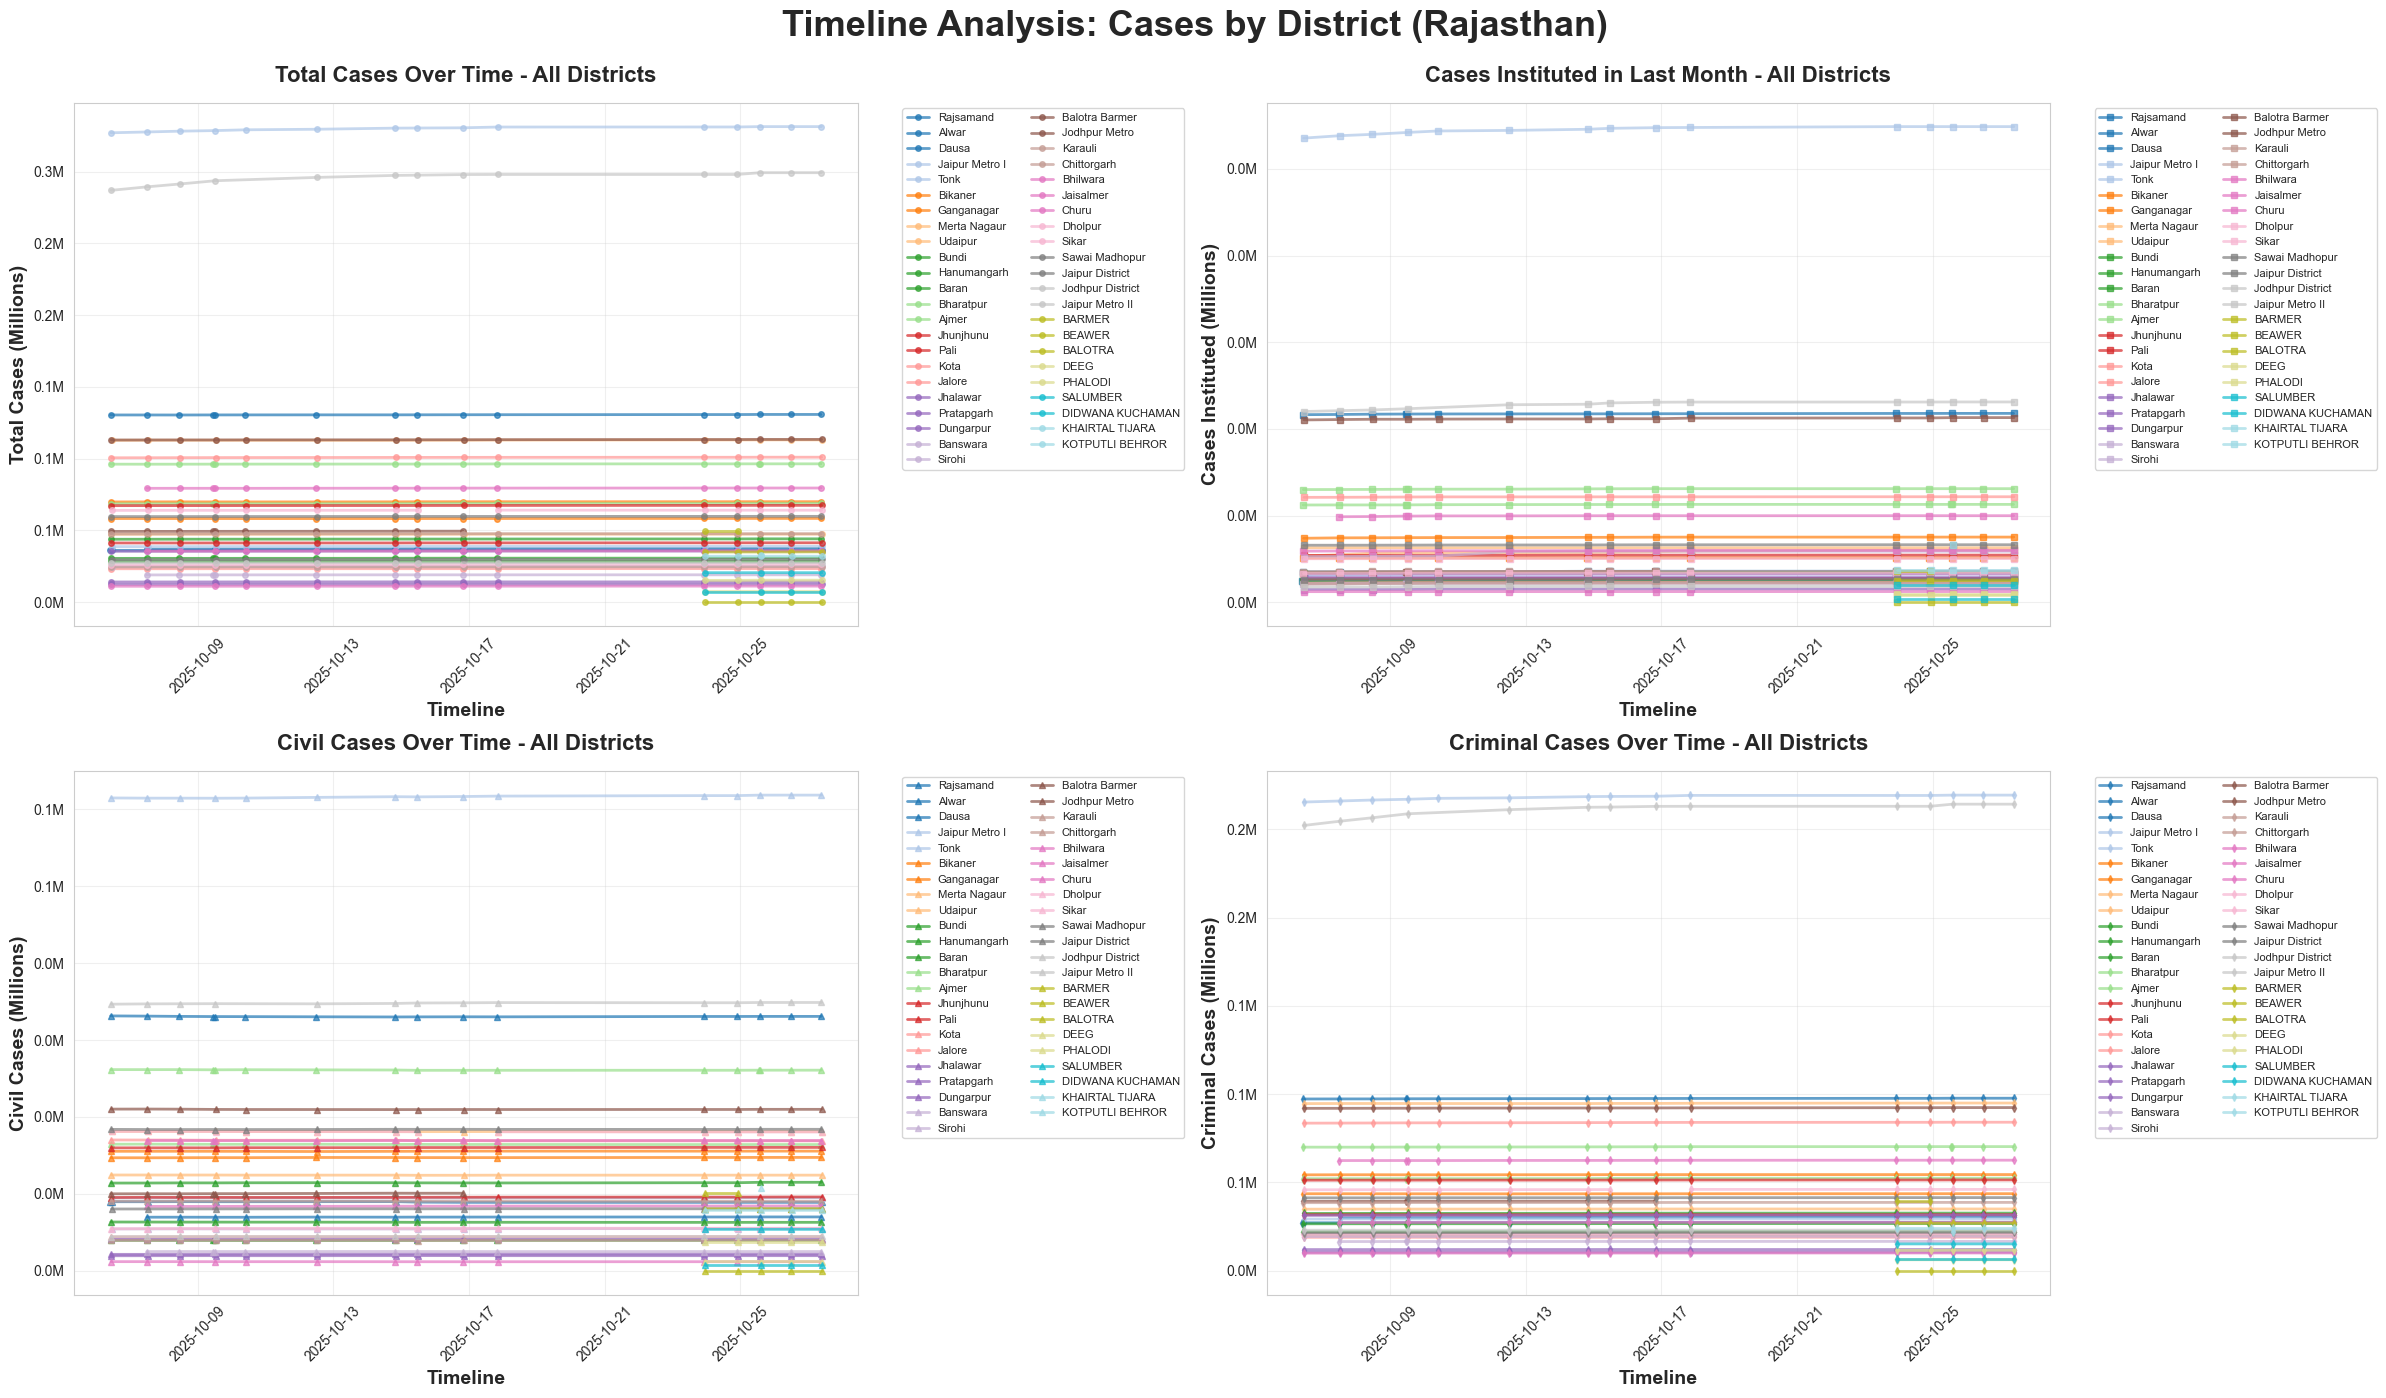

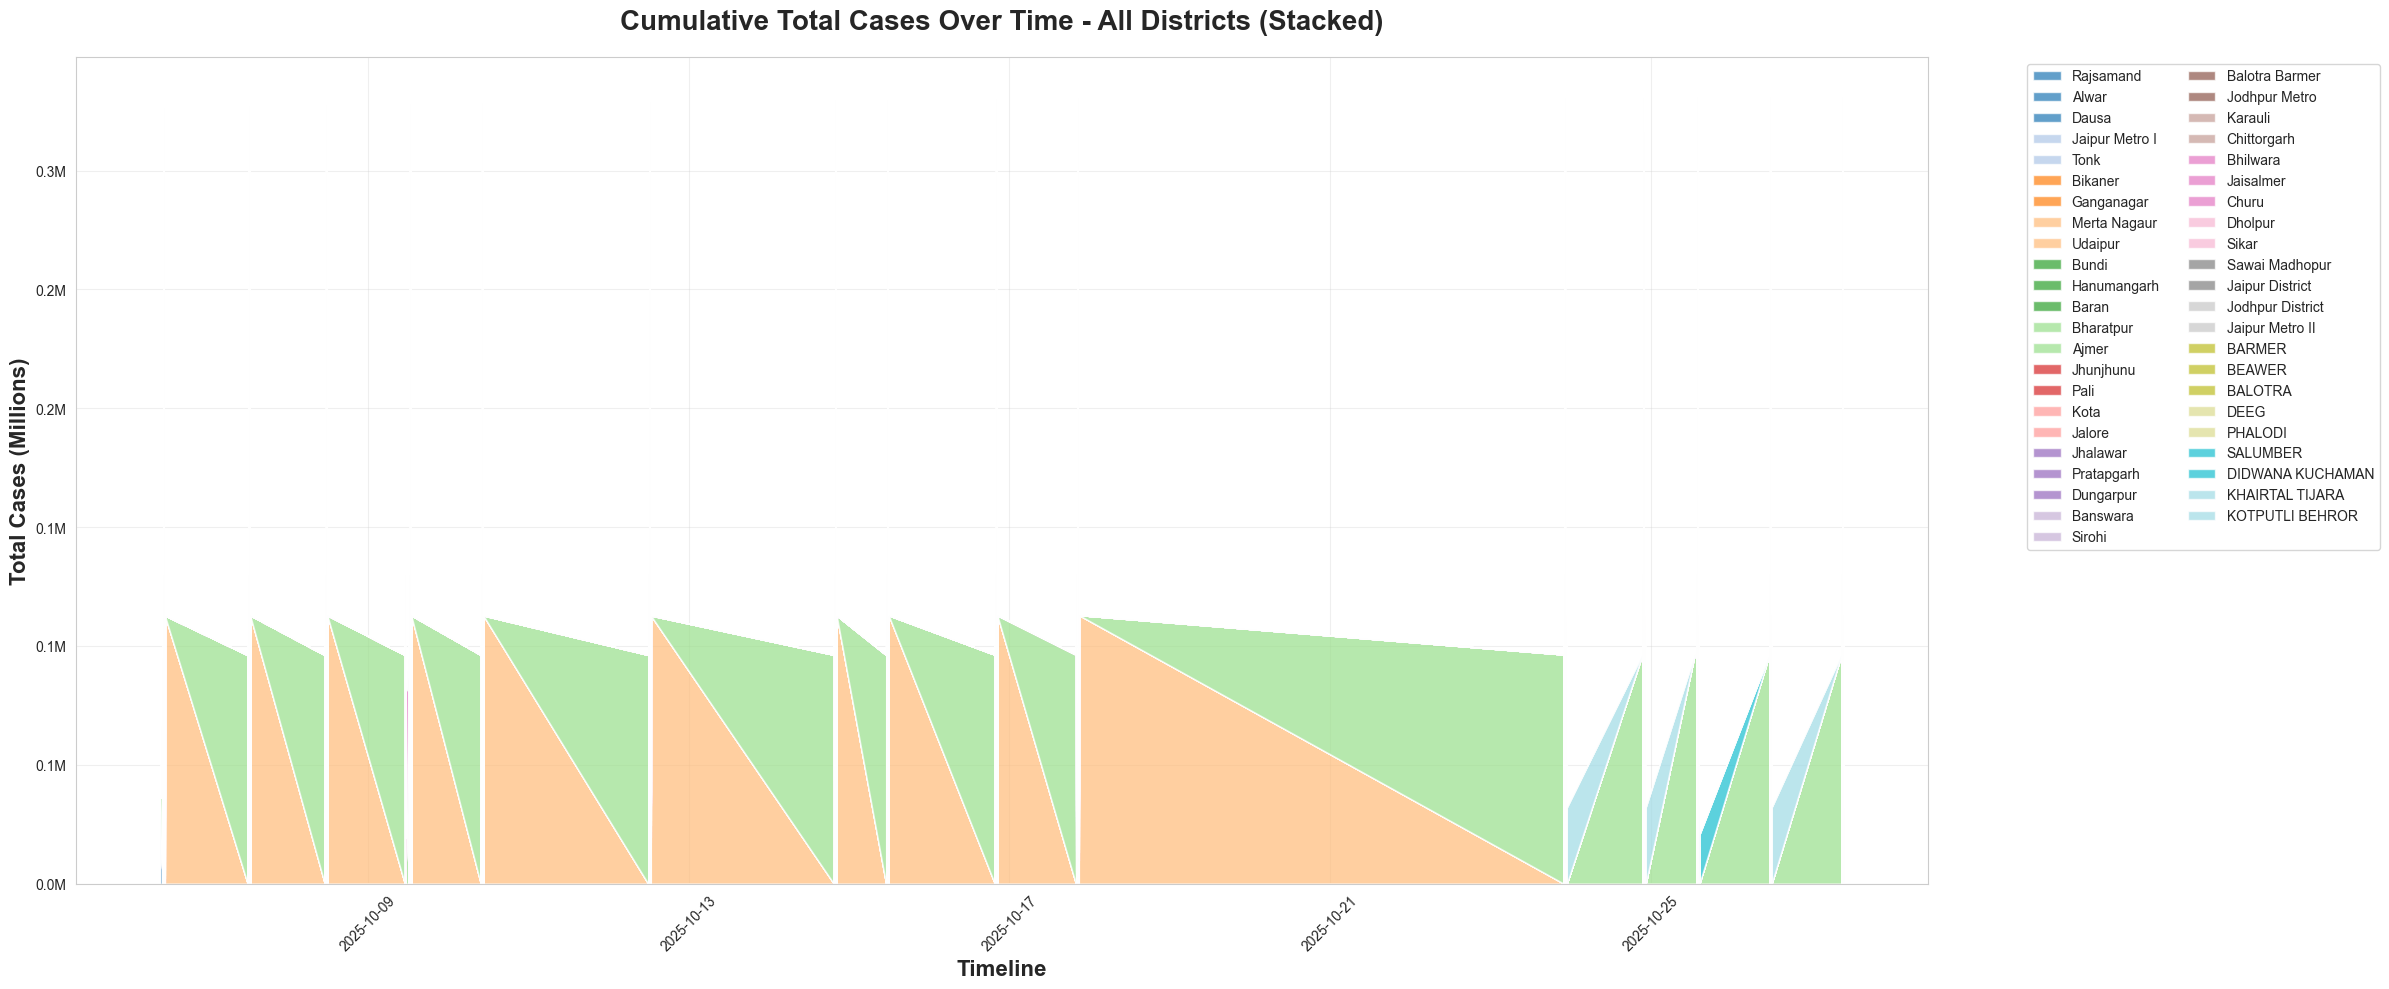

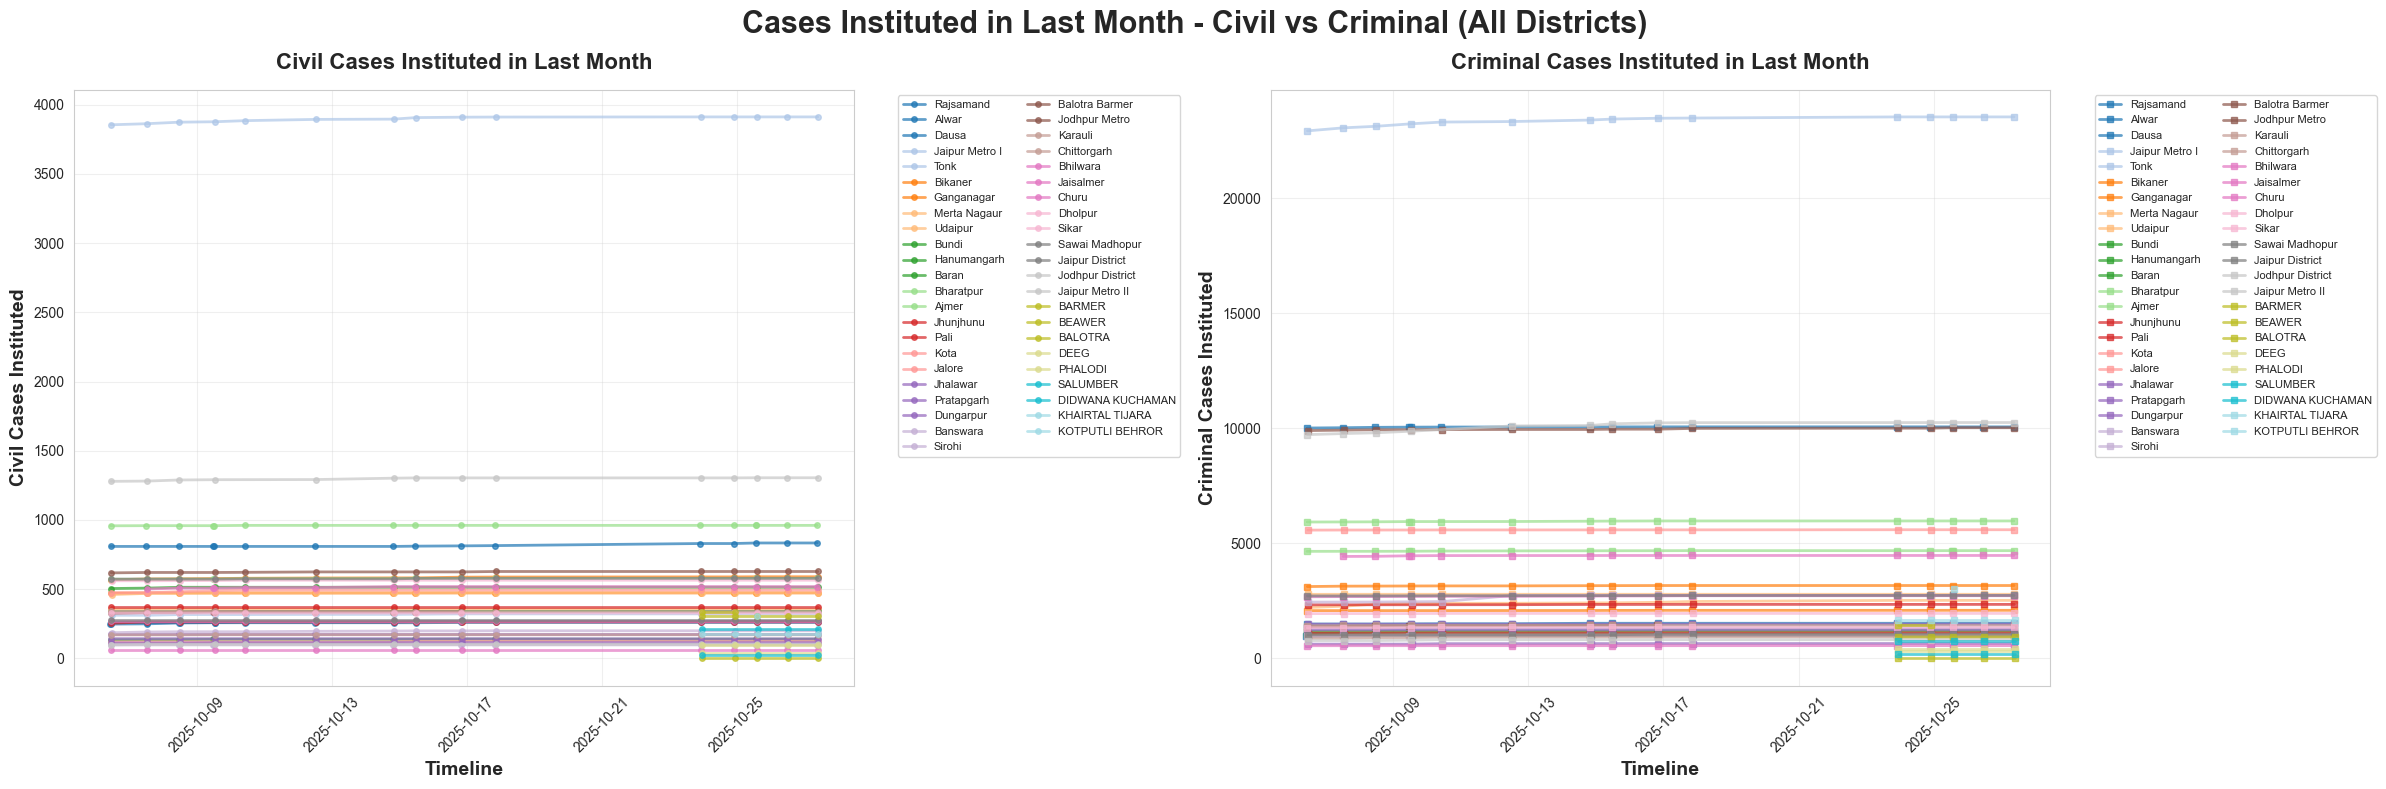


TIMELINE ANALYSIS SUMMARY

RAJSAMAND:
  Date Range: 2025-10-06 09:55:26 to 2025-10-27 09:28:02
  Total Records: 16
  Latest Total Cases: 36,365
  Latest Cases Instituted: 1,274
  Average Total Cases: 36,276
  Peak Total Cases: 36,365 on 2025-10-27 09:28:02

ALWAR:
  Date Range: 2025-10-06 10:34:06 to 2025-10-27 09:00:39
  Total Records: 16
  Latest Total Cases: 130,809
  Latest Cases Instituted: 10,893
  Average Total Cases: 130,594
  Peak Total Cases: 130,809 on 2025-10-25 13:38:24

DAUSA:
  Date Range: 2025-10-06 10:45:23 to 2025-10-27 09:10:48
  Total Records: 15
  Latest Total Cases: 37,509
  Latest Cases Instituted: 1,788
  Average Total Cases: 37,257
  Peak Total Cases: 37,509 on 2025-10-25 13:47:01

JAIPUR METRO I:
  Date Range: 2025-10-06 10:52:50 to 2025-10-27 09:16:26
  Total Records: 15
  Latest Total Cases: 331,298
  Latest Cases Instituted: 27,434
  Average Total Cases: 329,854
  Peak Total Cases: 331,298 on 2025-10-25 13:52:20

TONK:
  Date Range: 2025-10-06 11:15:23 to 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 12)

# ==== UPDATE THESE FILE PATHS WITH YOUR ACTUAL FILE NAMES ====

district_filename = r"C:\Users\Admin\Downloads\Rajasthan_data.xlsx"

print("="*70)
print("PROCESSING RAJASTHAN DISTRICT-WISE TIMELINE DATA")
print("="*70)

# Read all sheets from district file
district_excel = pd.ExcelFile(district_filename)
district_sheets = district_excel.sheet_names
print(f"Found {len(district_sheets)} districts: {', '.join(district_sheets)}")

# Function to format y-axis in millions
def millions(x, pos):
    return f'{x/1e6:.1f}M'

# Create figure with multiple subplots
fig = plt.figure(figsize=(24, 14))
fig.suptitle('Timeline Analysis: Cases by District (Rajasthan)', fontsize=26, fontweight='bold', y=0.995)

# Colors for different districts
colors = plt.cm.tab20(np.linspace(0, 1, len(district_sheets)))

# ==================== PLOT 1: Total Cases Timeline (All Districts) ====================
ax1 = plt.subplot(2, 2, 1)

for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    
    # Convert 'Date and Time' to datetime if not already
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        
        # Plot Total Cases
        ax1.plot(df['Date and Time'], df['Total Cases'], 
                marker='o', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax1.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax1.set_ylabel('Total Cases (Millions)', fontweight='bold', fontsize=14)
ax1.set_title('Total Cases Over Time - All Districts', fontsize=16, fontweight='bold', pad=15)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)

# ==================== PLOT 2: Instituted in Last Month - Total (All Districts) ====================
ax2 = plt.subplot(2, 2, 2)

for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        
        # Plot Instituted in last month - Total
        ax2.plot(df['Date and Time'], df['Instituted in last month - Total'], 
                marker='s', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax2.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax2.set_ylabel('Cases Instituted (Millions)', fontweight='bold', fontsize=14)
ax2.set_title('Cases Instituted in Last Month - All Districts', fontsize=16, fontweight='bold', pad=15)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(formatter)

# ==================== PLOT 3: Civil Cases Timeline ====================
ax3 = plt.subplot(2, 2, 3)

for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        
        # Plot Civil Cases
        ax3.plot(df['Date and Time'], df['Civil Cases'], 
                marker='^', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax3.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax3.set_ylabel('Civil Cases (Millions)', fontweight='bold', fontsize=14)
ax3.set_title('Civil Cases Over Time - All Districts', fontsize=16, fontweight='bold', pad=15)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)
ax3.yaxis.set_major_formatter(formatter)

# ==================== PLOT 4: Criminal Cases Timeline ====================
ax4 = plt.subplot(2, 2, 4)

for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        
        # Plot Criminal Cases
        ax4.plot(df['Date and Time'], df['Criminal Cases'], 
                marker='d', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax4.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax4.set_ylabel('Criminal Cases (Millions)', fontweight='bold', fontsize=14)
ax4.set_title('Criminal Cases Over Time - All Districts', fontsize=16, fontweight='bold', pad=15)
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)
ax4.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# ==================== PLOT 5: Stacked Area Chart - Total Cases ====================
fig, ax = plt.subplots(figsize=(24, 10))

# Prepare data for stacked area chart
all_dates = []
district_data = {}

for sheet in district_sheets:
    df = pd.read_excel(district_filename, sheet_name=sheet)
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        district_data[sheet] = df[['Date and Time', 'Total Cases']].set_index('Date and Time')

# Combine all data
if district_data:
    combined_df = pd.concat(district_data.values(), axis=1, keys=district_data.keys())
    combined_df.columns = district_data.keys()
    combined_df = combined_df.fillna(0)
    
    # Create stacked area chart
    ax.stackplot(combined_df.index, *[combined_df[col] for col in combined_df.columns],
                labels=combined_df.columns, alpha=0.7, colors=colors)
    
    ax.set_xlabel('Timeline', fontweight='bold', fontsize=16)
    ax.set_ylabel('Total Cases (Millions)', fontweight='bold', fontsize=16)
    ax.set_title('Cumulative Total Cases Over Time - All Districts (Stacked)', fontsize=20, fontweight='bold', pad=20)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=2)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# ==================== PLOT 6: Instituted Cases - Civil vs Criminal ====================
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('Cases Instituted in Last Month - Civil vs Criminal (All Districts)', fontsize=22, fontweight='bold')

# Civil Cases Instituted
ax1 = axes[0]
for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        ax1.plot(df['Date and Time'], df['Instituted in last month - Civil'], 
                marker='o', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax1.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax1.set_ylabel('Civil Cases Instituted', fontweight='bold', fontsize=14)
ax1.set_title('Civil Cases Instituted in Last Month', fontsize=16, fontweight='bold', pad=15)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Criminal Cases Instituted
ax2 = axes[1]
for idx, sheet in enumerate(district_sheets):
    df = pd.read_excel(district_filename, sheet_name=sheet)
    if 'Date and Time' in df.columns:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        ax2.plot(df['Date and Time'], df['Instituted in last month - Criminal'], 
                marker='s', linewidth=2, markersize=4, 
                label=sheet, color=colors[idx], alpha=0.7)

ax2.set_xlabel('Timeline', fontweight='bold', fontsize=14)
ax2.set_ylabel('Criminal Cases Instituted', fontweight='bold', fontsize=14)
ax2.set_title('Criminal Cases Instituted in Last Month', fontsize=16, fontweight='bold', pad=15)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==================== SUMMARY STATISTICS ====================
print("\n" + "="*70)
print("TIMELINE ANALYSIS SUMMARY")
print("="*70)

for sheet in district_sheets:
    df = pd.read_excel(district_filename, sheet_name=sheet)
    if 'Date and Time' in df.columns and len(df) > 0:
        df['Date and Time'] = pd.to_datetime(df['Date and Time'], errors='coerce')
        df = df.sort_values('Date and Time')
        
        print(f"\n{sheet.upper()}:")
        print(f"  Date Range: {df['Date and Time'].min()} to {df['Date and Time'].max()}")
        print(f"  Total Records: {len(df)}")
        print(f"  Latest Total Cases: {df['Total Cases'].iloc[-1]:,.0f}")
        print(f"  Latest Cases Instituted: {df['Instituted in last month - Total'].iloc[-1]:,.0f}")
        print(f"  Average Total Cases: {df['Total Cases'].mean():,.0f}")
        print(f"  Peak Total Cases: {df['Total Cases'].max():,.0f} on {df.loc[df['Total Cases'].idxmax(), 'Date and Time']}")

print("\n" + "="*70)
print("Analysis Complete!")
print("="*70)

total v/s sum of cases 

In [ ]:
# ==== UPDATE THESE FILE PATHS WITH YOUR ACTUAL FILE NAMES ====
state_filename = r"C:\Users\Admin\Downloads\States.xlsx"
district_filename = r"C:\Users\Admin\Downloads\Rajasthan_data.xlsx"

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9148\71038793.py:16: SyntaxWarning: invalid escape sequence '\s'
  df.columns = df.columns.str.strip().str.replace('\s+', ' ', regex=True)


Using Rajasthan file: C:\Users\Admin\Downloads\Rajasthan_data.xlsx
Using State file: C:\Users\Admin\Downloads\States.xlsx

READING RAJASTHAN DISTRICT DATA

Total sheets in Rajasthan file: 46
⚠  'JAIPUR METRO II' not found, processing all sheets

Sheets to process (up to JAIPUR METRO II, excluding specified districts): 36
Sheets: ['Rajsamand', 'Alwar', 'Dausa', 'Jaipur Metro I', 'Tonk', 'Bikaner', 'Ganganagar', 'Merta Nagaur', 'Udaipur', 'Bundi', 'Hanumangarh', 'Baran', 'Bharatpur', 'Ajmer', 'Jhunjhunu', 'Pali', 'Kota', 'Jalore', 'Jhalawar', 'Pratapgarh', 'Dungarpur', 'Banswara', 'Sirohi', 'Balotra Barmer', 'Jodhpur Metro', 'Karauli', 'Chittorgarh', 'Bhilwara', 'Jaisalmer', 'Churu', 'Dholpur', 'Sikar', 'Sawai Madhopur', 'Jaipur District', 'Jodhpur District', 'Jaipur Metro II']

✅ Successfully processed 36 district sheets

Total unique dates in district data: 15
Dates common to ALL 36 districts: 5

READING STATE-LEVEL DATA

Columns in State file (Rajasthan sheet): ['Date and Time', 'Civi

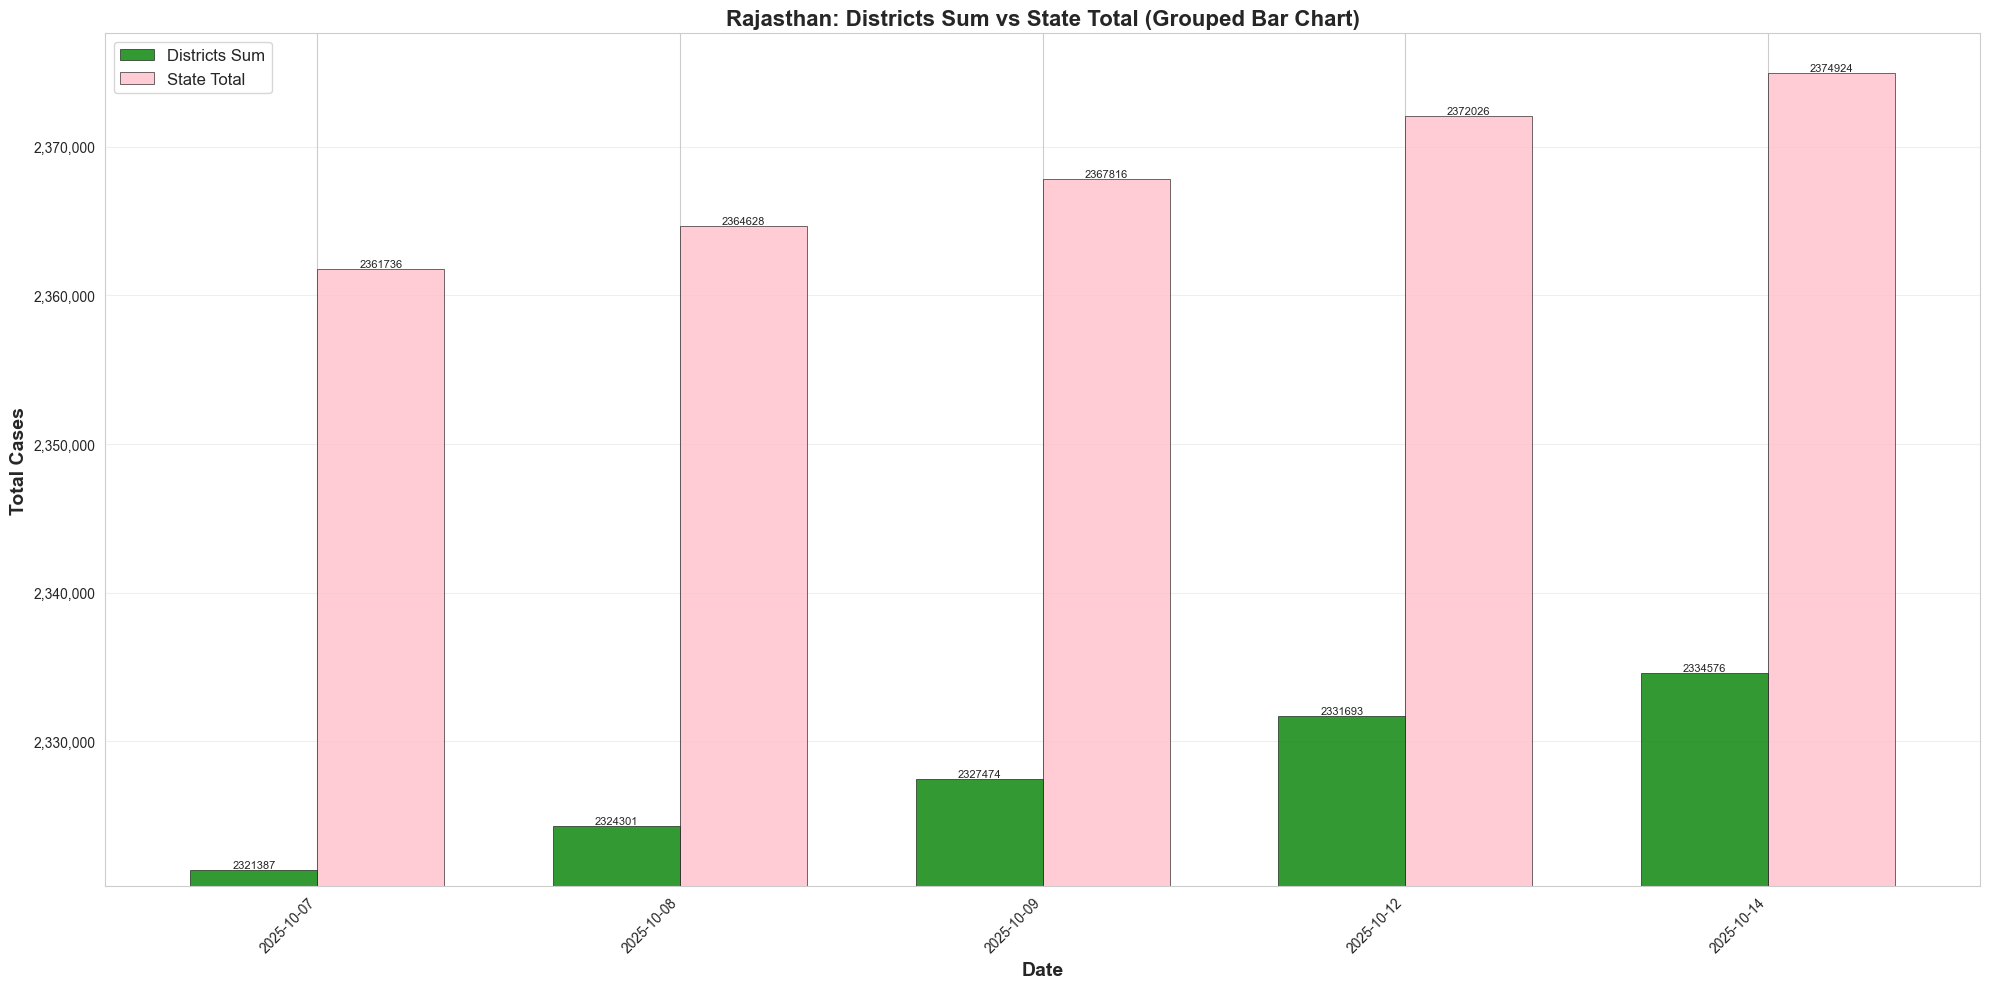


✅ Plot saved as 'rajasthan_verification.png'

✅ Comparison data exported to 'rajasthan_comparison.csv'

ANALYSIS COMPLETE


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File names
raj_filename =r"C:\Users\Admin\Downloads\Rajasthan_data.xlsx"
state_filename = r"C:\Users\Admin\Downloads\States.xlsx"

print(f"Using Rajasthan file: {raj_filename}")
print(f"Using State file: {state_filename}")

# Function to clean column names
def clean_columns(df):
    """Remove spaces and hidden characters from column names"""
    df.columns = df.columns.str.strip().str.replace('\s+', ' ', regex=True)
    return df

# Function to find date column
def find_date_column(df):
    """Automatically detect date column even with slight name variations"""
    for col in df.columns:
        col_lower = str(col).lower().strip()
        if 'date' in col_lower:
            return col
    return None

# Function to normalize date (remove time component)
def normalize_date(date_series):
    """Convert to datetime and extract only date part"""
    return pd.to_datetime(date_series).dt.date

# Read all sheets from Rajasthan file
print("\n" + "="*80)
print("READING RAJASTHAN DISTRICT DATA")
print("="*80)

raj_excel = pd.ExcelFile(raj_filename)
print(f"\nTotal sheets in Rajasthan file: {len(raj_excel.sheet_names)}")

# Districts to exclude
excluded_districts = ['BARMER', 'BEAWER', 'BALOTRA', 'DEEG', 'PHALODI', 
                     'SALUMBER', 'DIDWANA KUCHAMAN', 'KHAIRTAL TIJARA', 
                     'Sheet1', 'KOTPUTLI BEHROR']

# Find the index of 'JAIPUR METRO II'
try:
    jaipur_metro_ii_index = raj_excel.sheet_names.index('JAIPUR METRO II')
    # Include all sheets up to and including JAIPUR METRO II
    sheets_to_process = raj_excel.sheet_names[:jaipur_metro_ii_index + 1]
except ValueError:
    print("⚠  'JAIPUR METRO II' not found, processing all sheets")
    sheets_to_process = raj_excel.sheet_names

# Remove excluded districts
sheets_to_process = [sheet for sheet in sheets_to_process if sheet not in excluded_districts]

print(f"\nSheets to process (up to JAIPUR METRO II, excluding specified districts): {len(sheets_to_process)}")
print(f"Sheets: {sheets_to_process}")

# Combine all district data
all_districts = []
successful_sheets = []
skipped_sheets = []

for sheet in sheets_to_process:
    try:
        df = pd.read_excel(raj_filename, sheet_name=sheet)
        
        # Clean column names
        df = clean_columns(df)
        
        # Find date column
        date_col = find_date_column(df)
        
        if date_col is None:
            print(f"⚠  Skipping sheet '{sheet}' - no date column found")
            print(f"   Available columns: {list(df.columns)}")
            skipped_sheets.append(sheet)
            continue
        
        # Check for Total Cases column
        if 'Total Cases' not in df.columns:
            print(f"⚠  Skipping sheet '{sheet}' - 'Total Cases' column not found")
            print(f"   Available columns: {list(df.columns)}")
            skipped_sheets.append(sheet)
            continue
        
        # Normalize date (remove time component)
        df['Date'] = normalize_date(df[date_col])
        
        # If there are duplicate dates, keep only the first occurrence
        df = df.drop_duplicates(subset=['Date'], keep='first')
        
        # Select only Date and Total Cases columns
        df_selected = df[['Date', 'Total Cases']].copy()
        df_selected['District'] = sheet
        
        all_districts.append(df_selected)
        successful_sheets.append(sheet)
        
    except Exception as e:
        print(f"❌ Error processing sheet '{sheet}': {str(e)}")
        skipped_sheets.append(sheet)
        continue

if len(all_districts) == 0:
    raise ValueError("❌ No valid sheets found with required columns!")

print(f"\n✅ Successfully processed {len(successful_sheets)} district sheets")
if skipped_sheets:
    print(f"⚠  Skipped {len(skipped_sheets)} sheets: {skipped_sheets}")

# Concatenate all districts and sum by date across all districts
districts_combined = pd.concat(all_districts, ignore_index=True)
districts_daily = districts_combined.groupby('Date')['Total Cases'].sum().reset_index()
districts_daily.columns = ['Date', 'Districts_Total']

# Get common dates across all processed districts to ensure fair comparison
# Find dates that exist in all districts
date_counts = districts_combined.groupby('Date')['District'].nunique().reset_index()
date_counts.columns = ['Date', 'District_Count']
# Only keep dates that appear in ALL processed districts
common_dates = date_counts[date_counts['District_Count'] == len(successful_sheets)]['Date'].tolist()

print(f"\nTotal unique dates in district data: {len(districts_daily)}")
print(f"Dates common to ALL {len(successful_sheets)} districts: {len(common_dates)}")

# Filter to only common dates
districts_daily = districts_daily[districts_daily['Date'].isin(common_dates)]

# Read Rajasthan state data
print("\n" + "="*80)
print("READING STATE-LEVEL DATA")
print("="*80)

state_df = pd.read_excel(state_filename, sheet_name='Rajasthan')

# Clean column names
state_df = clean_columns(state_df)

# Print columns for debugging
print(f"\nColumns in State file (Rajasthan sheet): {list(state_df.columns)}")

# Find date column
state_date_col = find_date_column(state_df)
if state_date_col is None:
    raise ValueError("❌ No date column found in state file!")

print(f"Using date column: '{state_date_col}'")

# Normalize date
state_df['Date'] = normalize_date(state_df[state_date_col])

# If there are duplicate dates, keep only the first occurrence
state_df = state_df.drop_duplicates(subset=['Date'], keep='first')

# Select only Date and Total Cases columns
state_daily = state_df[['Date', 'Total Cases']].copy()
state_daily.columns = ['Date', 'State_Total']

print(f"Total unique dates in state data: {len(state_daily)}")

# Merge both datasets - only keep dates that are common
print("\n" + "="*80)
print("COMPARING DISTRICT SUM vs STATE TOTAL (COMMON DATES ONLY)")
print("="*80)

comparison = pd.merge(districts_daily, state_daily, on='Date', how='inner')  # Changed to 'inner' to keep only common dates
comparison = comparison.sort_values('Date').reset_index(drop=True)

# Calculate difference
comparison['Difference'] = comparison['Districts_Total'] - comparison['State_Total']
comparison['Match'] = comparison['Difference'] == 0

# Display results
print(f"\nTotal days analyzed (common dates only): {len(comparison)}")
print(f"Days with matching data: {comparison['Match'].sum()}")
print(f"Days with discrepancies: {(~comparison['Match']).sum()}")

# Print first few rows
print("\n" + "="*80)
print("FIRST FEW ROWS OF COMPARISON")
print("="*80)
print(comparison.head(10).to_string(index=False))

if comparison['Difference'].abs().sum() != 0:
    print("\n" + "="*80)
    print("⚠  DISCREPANCIES FOUND!")
    print("="*80)
    discrepancies = comparison[comparison['Difference'] != 0]
    print(f"\nTotal days with discrepancies: {len(discrepancies)}")
    print(f"\nTotal difference across all days: {comparison['Difference'].sum():.0f}")
    print(f"Average absolute difference: {comparison['Difference'].abs().mean():.2f}")
    print(f"Maximum difference: {comparison['Difference'].abs().max():.0f}")
    
    print("\n" + "="*80)
    print("DAYS WITH DISCREPANCIES (showing first 20)")
    print("="*80)
    print(discrepancies.head(20).to_string(index=False))
else:
    print("\n" + "="*80)
    print("✅ ALL DATA MATCHES PERFECTLY!")
    print("="*80)

# Create visualization
print("\n" + "="*80)
print("GENERATING PLOT")
print("="*80)

plt.figure(figsize=(20, 10))

dates_formatted = [str(d) for d in comparison['Date']]
x_positions = np.arange(len(comparison))
bar_width = 0.35  # Width of each bar

# Create grouped bars
bars1 = plt.bar(x_positions - bar_width/2, comparison['Districts_Total'], 
                bar_width, label='Districts Sum', color='green', alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = plt.bar(x_positions + bar_width/2, comparison['State_Total'], 
                bar_width, label='State Total', color='pink', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels on top of bars for better readability
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    # Only show labels for every nth bar to avoid crowding
    if i % max(1, len(comparison) // 20) == 0:
        plt.text(bar1.get_x() + bar1.get_width()/2., height1,
                f'{int(height1)}', ha='center', va='bottom', fontsize=8)
        plt.text(bar2.get_x() + bar2.get_width()/2., height2,
                f'{int(height2)}', ha='center', va='bottom', fontsize=8)

# Adjust Y-axis range to highlight differences
min_value = min(comparison['Districts_Total'].min(), comparison['State_Total'].min())
max_value = max(comparison['Districts_Total'].max(), comparison['State_Total'].max())
y_range = max_value - min_value
plt.ylim(min_value - y_range * 0.02, max_value + y_range * 0.05)

# Configure X-axis
step = max(1, len(comparison) // 15)  # Show around 15 dates
plt.xticks(x_positions[::step], dates_formatted[::step], rotation=45, ha='right', fontsize=10)

# Labels and title
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Total Cases', fontsize=14, fontweight='bold')
plt.title('Rajasthan: Districts Sum vs State Total (Grouped Bar Chart)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('rajasthan_verification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved as 'rajasthan_verification.png'")

# Export comparison to CSV
comparison.to_csv('rajasthan_comparison.csv', index=False)
print("\n✅ Comparison data exported to 'rajasthan_comparison.csv'")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)